In [1]:
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# **carga del set de datos**

In [2]:
#la carga es directa
font_1 = np.array([
   [0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00],   # 0x20, space
   [0x04, 0x04, 0x04, 0x04, 0x04, 0x00, 0x04],   # 0x21, !
   [0x09, 0x09, 0x12, 0x00, 0x00, 0x00, 0x00],   # 0x22, "
   [0x0a, 0x0a, 0x1f, 0x0a, 0x1f, 0x0a, 0x0a],   # 0x23, #
   [0x04, 0x0f, 0x14, 0x0e, 0x05, 0x1e, 0x04],   # 0x24, $
   [0x19, 0x19, 0x02, 0x04, 0x08, 0x13, 0x13],   # 0x25, %
   [0x04, 0x0a, 0x0a, 0x0a, 0x15, 0x12, 0x0d],   # 0x26, &
   [0x04, 0x04, 0x08, 0x00, 0x00, 0x00, 0x00],   # 0x27, '
   [0x02, 0x04, 0x08, 0x08, 0x08, 0x04, 0x02],   # 0x28, (
   [0x08, 0x04, 0x02, 0x02, 0x02, 0x04, 0x08],   # 0x29, )
   [0x04, 0x15, 0x0e, 0x1f, 0x0e, 0x15, 0x04],   # 0x2a, *
   [0x00, 0x04, 0x04, 0x1f, 0x04, 0x04, 0x00],   # 0x2b, +
   [0x00, 0x00, 0x00, 0x00, 0x04, 0x04, 0x08],   # 0x2c, ,
   [0x00, 0x00, 0x00, 0x1f, 0x00, 0x00, 0x00],   # 0x2d, -
   [0x00, 0x00, 0x00, 0x00, 0x00, 0x0c, 0x0c],   # 0x2e, .
   [0x01, 0x01, 0x02, 0x04, 0x08, 0x10, 0x10],   # 0x2f, /
   [0x0e, 0x11, 0x13, 0x15, 0x19, 0x11, 0x0e],   # 0x30, 0
   [0x04, 0x0c, 0x04, 0x04, 0x04, 0x04, 0x0e],   # 0x31, 1
   [0x0e, 0x11, 0x01, 0x02, 0x04, 0x08, 0x1f],   # 0x32, 2
   [0x0e, 0x11, 0x01, 0x06, 0x01, 0x11, 0x0e],   # 0x33, 3
   [0x02, 0x06, 0x0a, 0x12, 0x1f, 0x02, 0x02],   # 0x34, 4
   [0x1f, 0x10, 0x1e, 0x01, 0x01, 0x11, 0x0e],   # 0x35, 5
   [0x06, 0x08, 0x10, 0x1e, 0x11, 0x11, 0x0e],   # 0x36, 6
   [0x1f, 0x01, 0x02, 0x04, 0x08, 0x08, 0x08],   # 0x37, 7
   [0x0e, 0x11, 0x11, 0x0e, 0x11, 0x11, 0x0e],   # 0x38, 8
   [0x0e, 0x11, 0x11, 0x0f, 0x01, 0x02, 0x0c],   # 0x39, 9
   [0x00, 0x0c, 0x0c, 0x00, 0x0c, 0x0c, 0x00],   # 0x3a, :
   [0x00, 0x0c, 0x0c, 0x00, 0x0c, 0x04, 0x08],   # 0x3b, ;
   [0x02, 0x04, 0x08, 0x10, 0x08, 0x04, 0x02],   # 0x3c, <
   [0x00, 0x00, 0x1f, 0x00, 0x1f, 0x00, 0x00],   # 0x3d, =
   [0x08, 0x04, 0x02, 0x01, 0x02, 0x04, 0x08],   # 0x3e, >
   [0x0e, 0x11, 0x01, 0x02, 0x04, 0x00, 0x04]   # 0x3f, ?
   ])

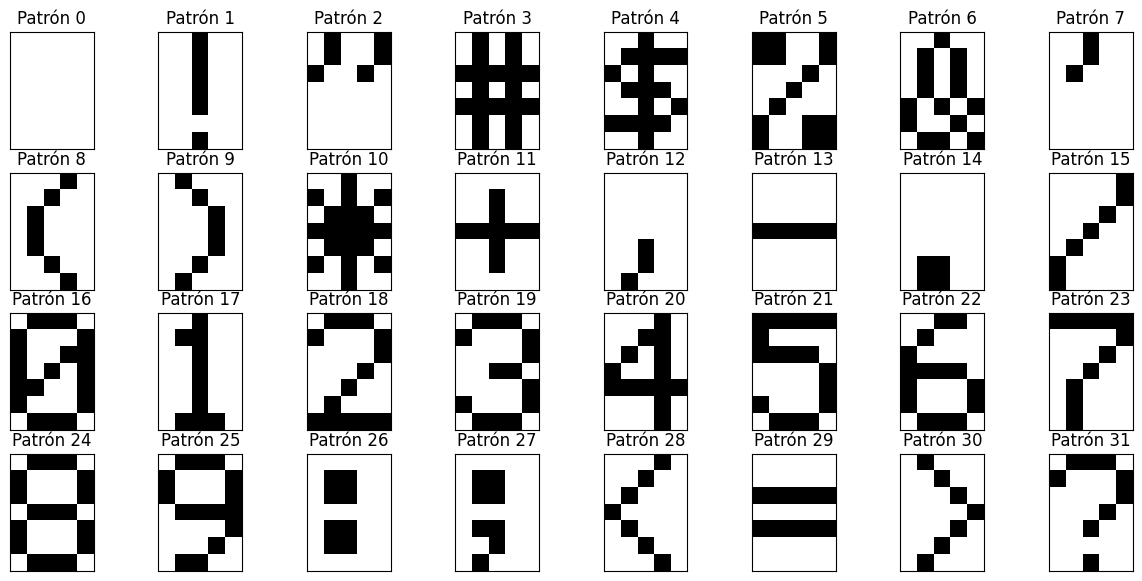

In [3]:
fig, axes = plt.subplots(4, 8, figsize=(15, 7))
axes = axes.ravel()

# Se convierte a matrices de 7x5
for i, pattern in enumerate(font_1):
    matrix_7x5 = np.zeros((7, 5), dtype=int)

    for row in range(7):
        for col in range(5):
            # Se extrae el bit correspondiente de la representación hex
            matrix_7x5[row, col] = (pattern[row] >> (4 - col)) & 1

    # Se seleccionar el eje correspondiente
    ax = axes[i]

    ax.imshow(matrix_7x5, cmap='Greys', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Patrón {i}')  # Título con el valor hexadecimal


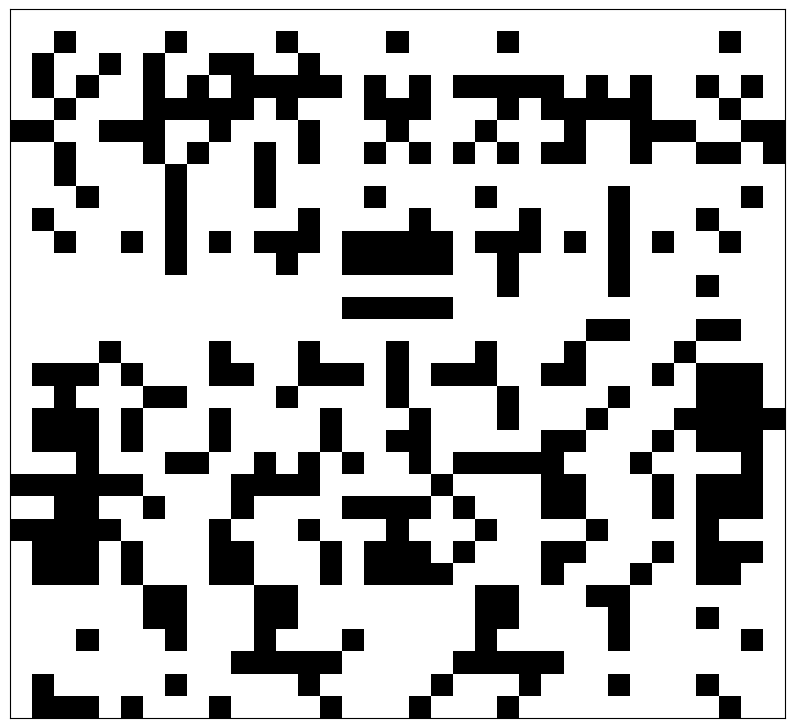

In [4]:
#se busca obtener la matriz de datos
X_datos= []

# Convertir cada patrón de 7x5 a una fila de 35 elementos
for pattern in font_1:
    patron = np.zeros((7, 5), dtype=int)
    #se obtiene el patron
    for row in range(7):
        for col in range(5):
            patron[row, col] = (pattern[row] >> (4 - col)) & 1

    # se pasa a un vector
    patron_aplanado = patron.flatten()

    # se añade a la matriz de datos
    X_datos.append(patron_aplanado)

X_datos = np.array(X_datos)

# Se grafica los patrones
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(X_datos, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# **Modelo 01**

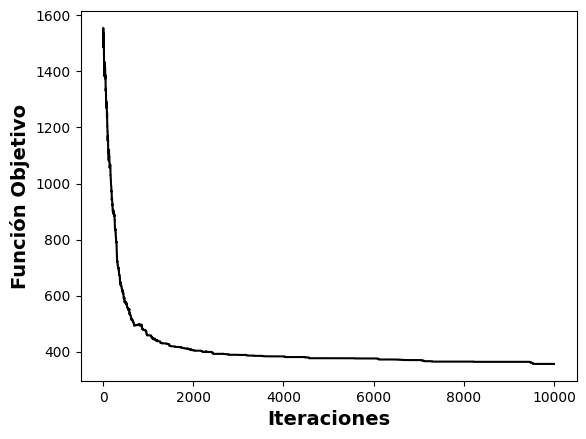

CPU times: user 633 ms, sys: 46.3 ms, total: 679 ms
Wall time: 724 ms


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2
W_encoder = np.random.uniform(-1, 1, size=(n_atributos,n_neuronas_espacio_latente))
W_decoder = np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,n_atributos))

#Se define la función objetivo
def Funcion_objetivo_01(W_encoder_modelo,W_decoder_modelo):

  Z1= np.dot(X_datos,W_encoder_modelo)
  Z2 =np.dot(Z1,W_decoder_modelo)

  error = np.abs(Z2 - X_datos)
  error_total= error.sum()

  return Z2,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder.copy()
W_decoder_actual=W_decoder.copy()
Y_actual,Error_actual= Funcion_objetivo_01(W_encoder,W_decoder)
#se comienza las iteraciones
iteraciones=10000
tamaño_paso=0.05
#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
for i in range(iteraciones):
#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=(n_atributos,n_neuronas_espacio_latente))*tamaño_paso
  W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,n_atributos))*tamaño_paso
#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_01(W_encoder_candidato,W_decoder_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial/(i+1)
#se calcular el criterio de aceptación
  criterio=math.exp(-(Diferencia/t))
  Probabilidad_p[i]=criterio

#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()


In [ ]:
print(Error_modelo[-1])

356.6075025160276


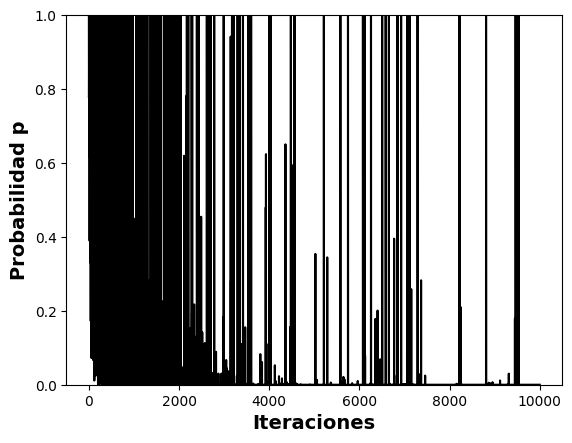

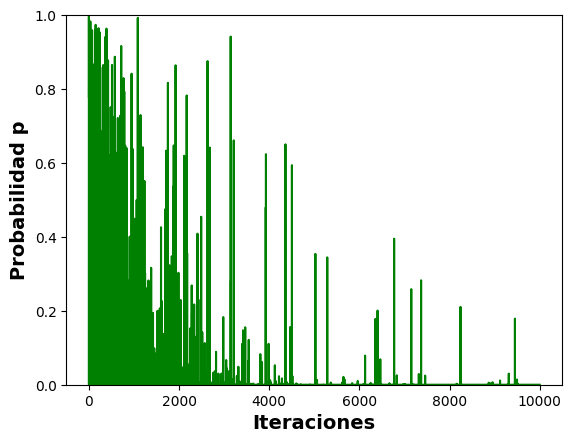

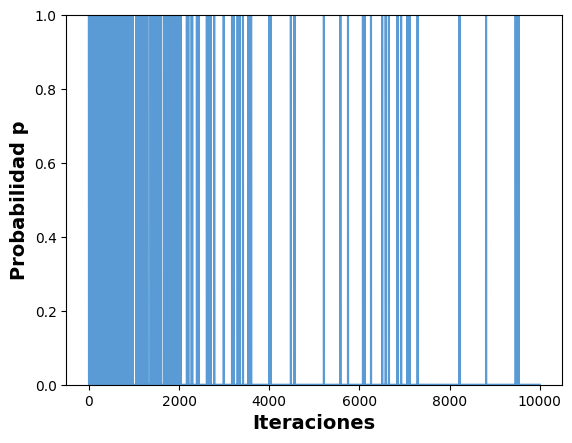

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 <1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

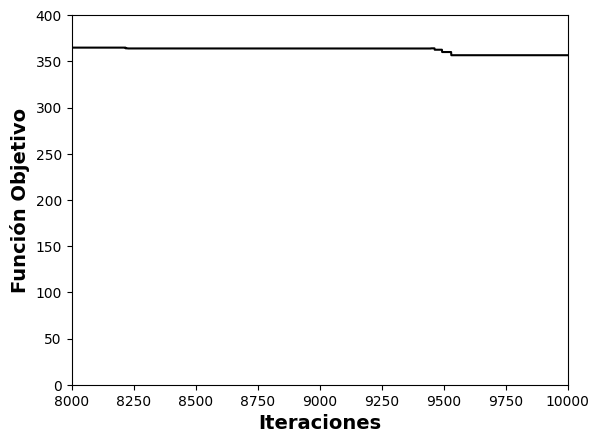

In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,400)
plt.xlim(8000,10000)
plt.show()

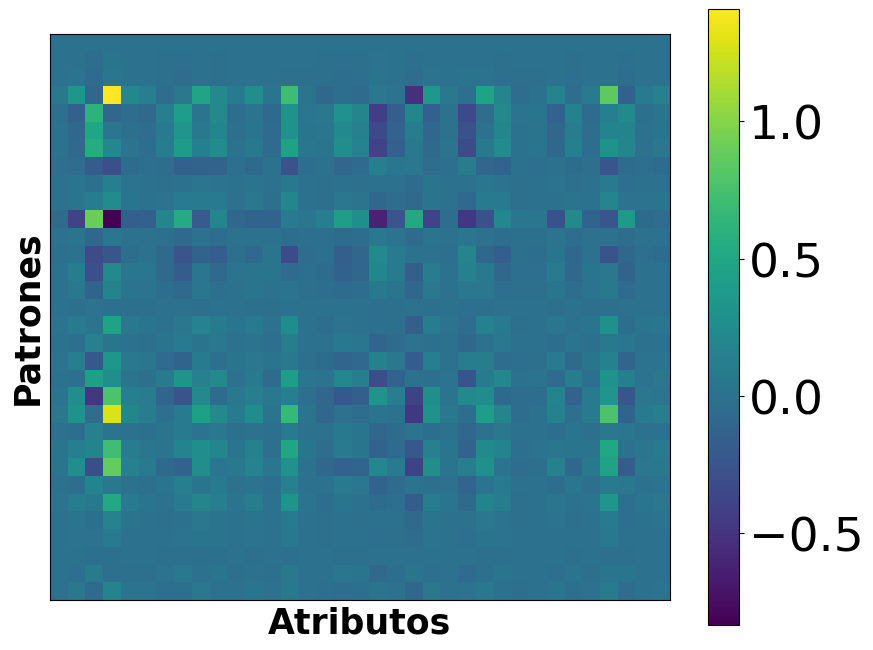

In [ ]:
#se plantea la matriz resultado inicial o final
Z1= np.dot(X_datos,W_encoder_actual)
Z2 =np.dot(Z1,W_decoder_actual)

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(Z2, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

# **Modelo 02 , red simple con aprendisaje variable y temperatura exponencial**

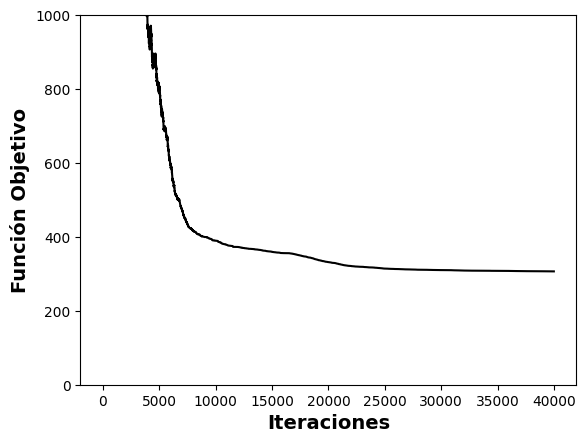

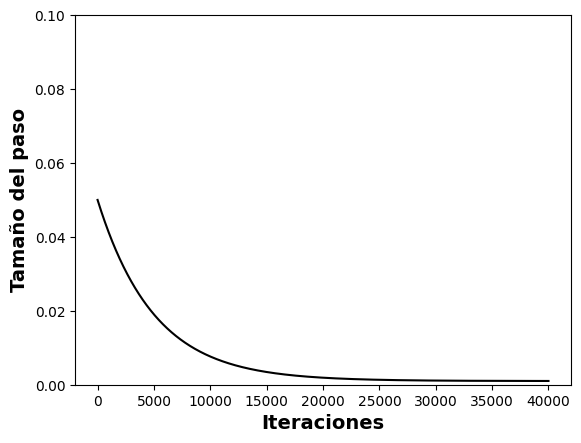

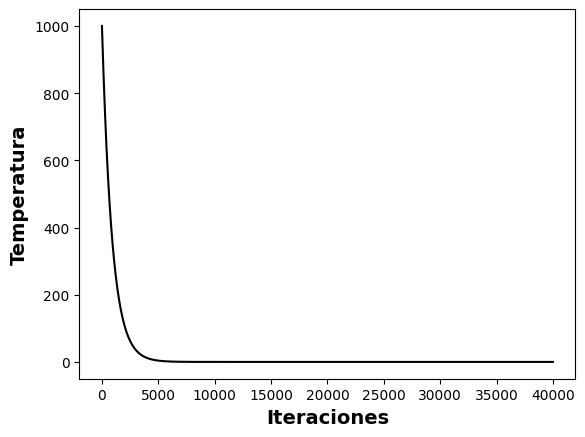

CPU times: user 3.54 s, sys: 128 ms, total: 3.66 s
Wall time: 5.25 s


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2
W_encoder = np.random.uniform(-1, 1, size=(n_atributos,n_neuronas_espacio_latente))
W_decoder = np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,n_atributos))

#Se define la función objetivo
def Funcion_objetivo_01(W_encoder_modelo,W_decoder_modelo):

  Z1= np.dot(X_datos,W_encoder_modelo)
  Z2 =np.dot(Z1,W_decoder_modelo)

  error = np.abs(Z2 - X_datos)
  error_total= error.sum()

  return Z2,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder.copy()
W_decoder_actual=W_decoder.copy()
Y_actual,Error_actual= Funcion_objetivo_01(W_encoder,W_decoder)
#se comienza las iteraciones
iteraciones=40000
tamaño_paso_inicial=0.05
#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp(-i/5000)+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=(n_atributos,n_neuronas_espacio_latente))*tamaño_paso
  W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,n_atributos))*tamaño_paso
#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_01(W_encoder_candidato,W_decoder_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1000)
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

In [ ]:
(-Diferencia/t)

<ipython-input-173-c7288149ad4c>:1: RuntimeWarning: divide by zero encountered in scalar divide
  (-Diferencia/t)


-inf

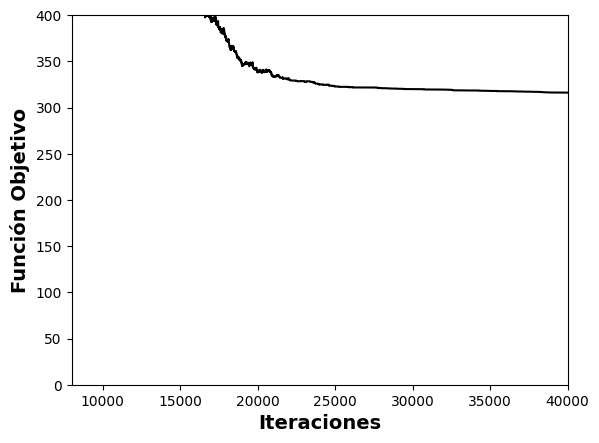

316.13165480298


In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,400)
plt.xlim(8000,40000)
plt.show()
print(Error_modelo[-1])


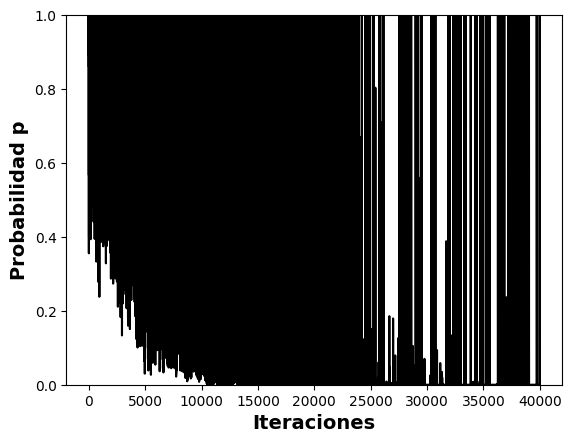

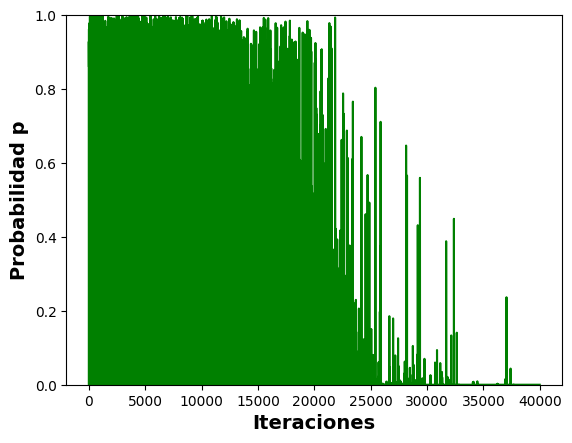

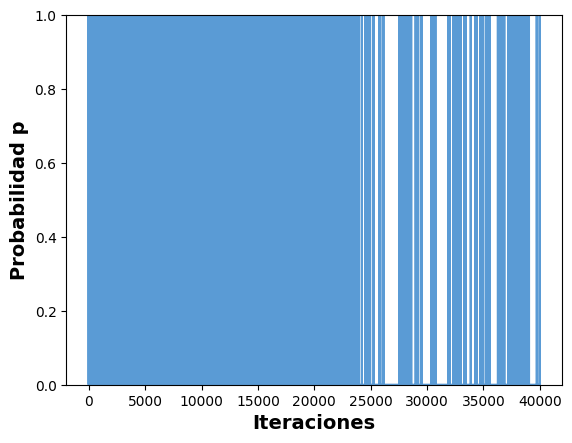

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

In [ ]:
Probabilidad_p_filtrado2[6002]

0.0

# **Modelo 3 aprendisaje variable, temperatura exponencial , 10 neuronas en capa oculta**

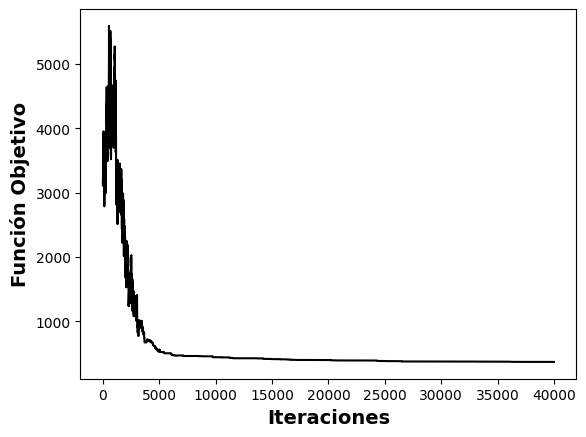

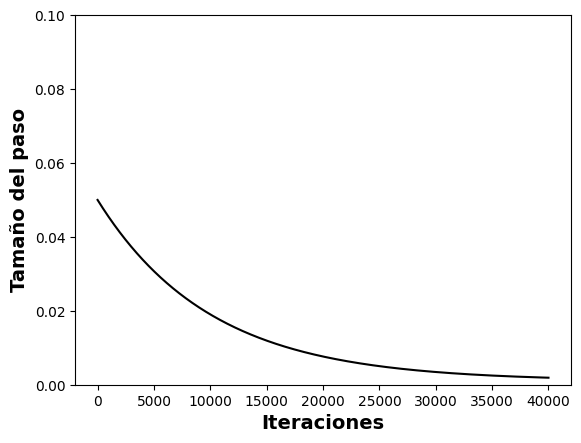

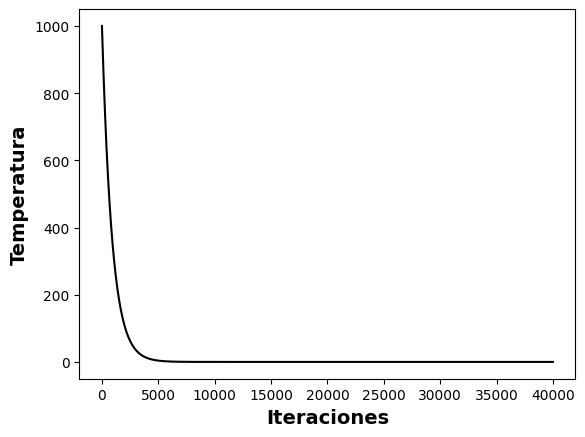

CPU times: user 5.94 s, sys: 148 ms, total: 6.09 s
Wall time: 8.44 s


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1=10
neuronas_capa_oculta_decoder_1=10

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))




#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida,W_E_CO_1,W_D_CO_1):

  Z1= np.dot(X_datos,W_encoder_modelo_entrada)
  Z2 =np.dot(Z1,W_E_CO_1)
  Z3 =np.dot(Z2,W_D_CO_1)
  Z4 =np.dot(Z3,W_decoder_modelo_salida)

  error = np.abs(Z4 - X_datos)
  error_total= error.sum()

  return Z4,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()


Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_E_CO_1_actual,W_D_CO_1_actual)
#se comienza las iteraciones
iteraciones=40000
tamaño_paso_inicial=0.05
#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp(-i/10000)+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=W_encoder_actual.shape)*tamaño_paso
  W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=W_decoder_actual.shape)*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

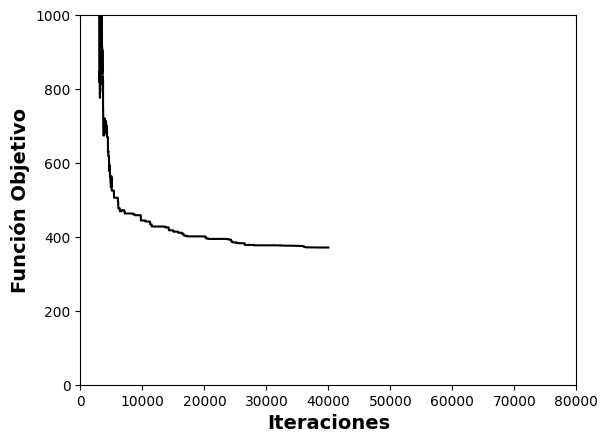

371.20716890207393


In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1000)
plt.xlim(0,80000)
plt.show()
print(Error_modelo[-1])

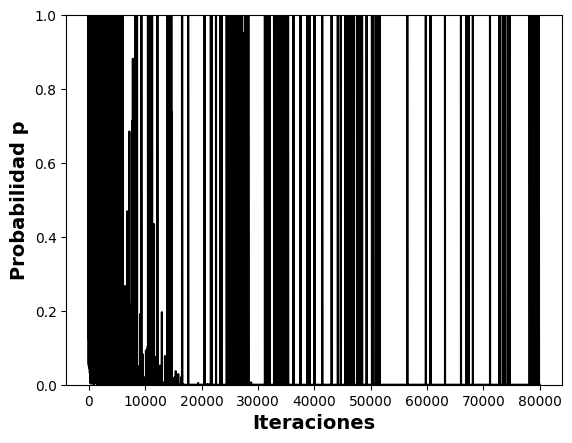

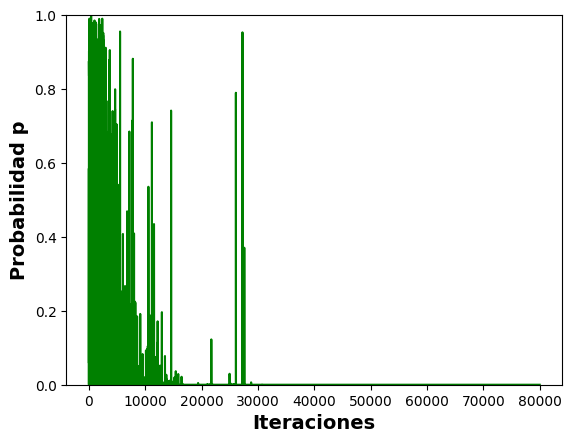

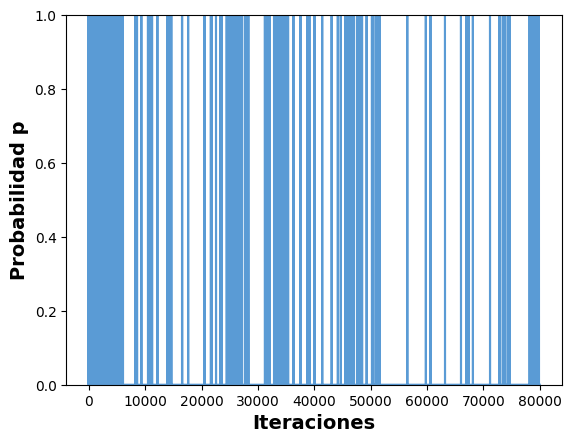

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

# **Modelo 4 aprendisaje variable, temperatura exponencial , 10 neuronas en capa oculta, activacion sigmoide**

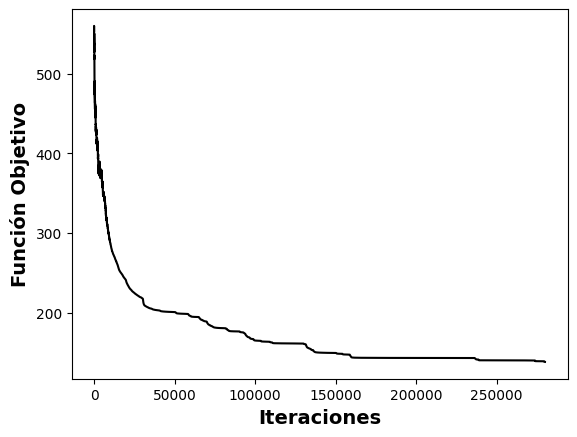

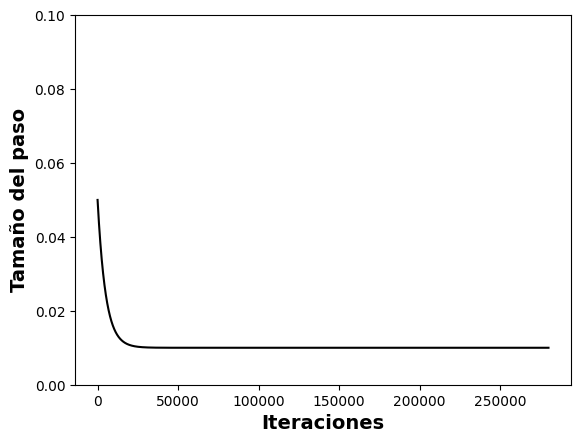

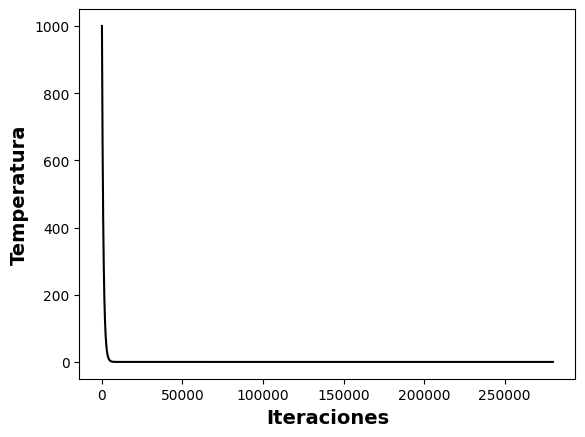

CPU times: user 1min 24s, sys: 520 ms, total: 1min 25s
Wall time: 1min 25s


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 20

neuronas_capa_oculta_encoder_1=60
neuronas_capa_oculta_decoder_1=60

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))


def sigmoide(x):
    return 1 / (1 + np.exp(-x))

#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida,W_E_CO_1,W_D_CO_1):

  Z1= np.dot(X_datos,W_encoder_modelo_entrada)
  Z1_act=sigmoide(Z1)

  Z2 =np.dot(Z1_act,W_E_CO_1)
  Z2_act=sigmoide(Z2)

  Z3 =np.dot(Z2_act,W_D_CO_1)
  Z3_act=sigmoide(Z3)

  Z4 =np.dot(Z3_act,W_decoder_modelo_salida)
  Z4_act=sigmoide(Z4)



  error = np.abs(Z4_act - X_datos)
  error_total= error.sum()

  return Z4_act,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()


Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1)
#se comienza las iteraciones
iteraciones=280000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.01)*np.exp(-i/5000)+0.01
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

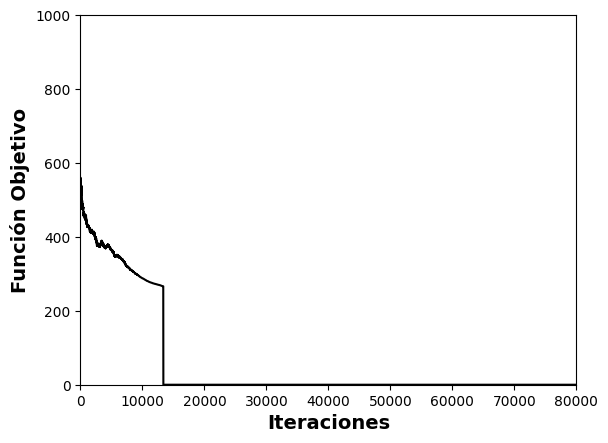

0.0


In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1000)
plt.xlim(0,80000)
plt.show()
print(Error_modelo[-1])

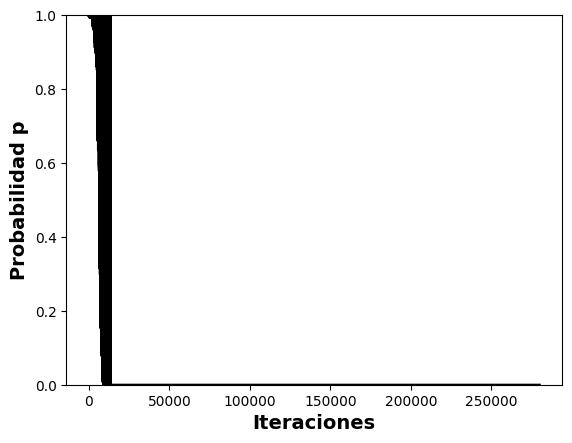

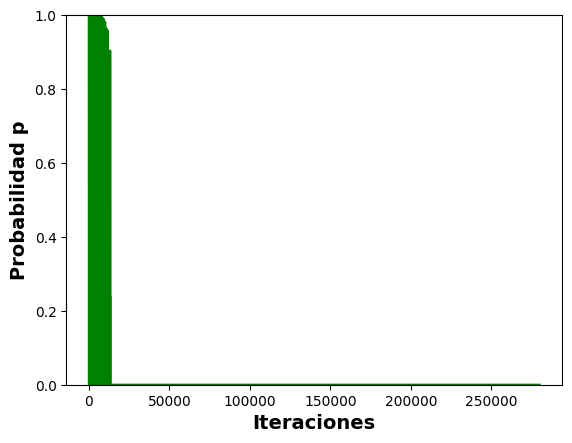

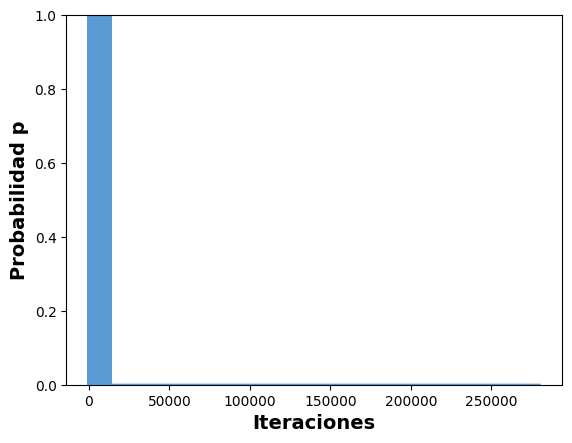

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

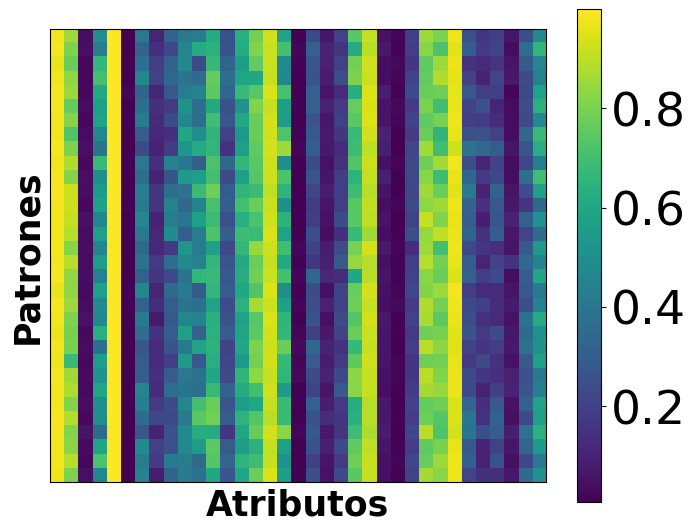

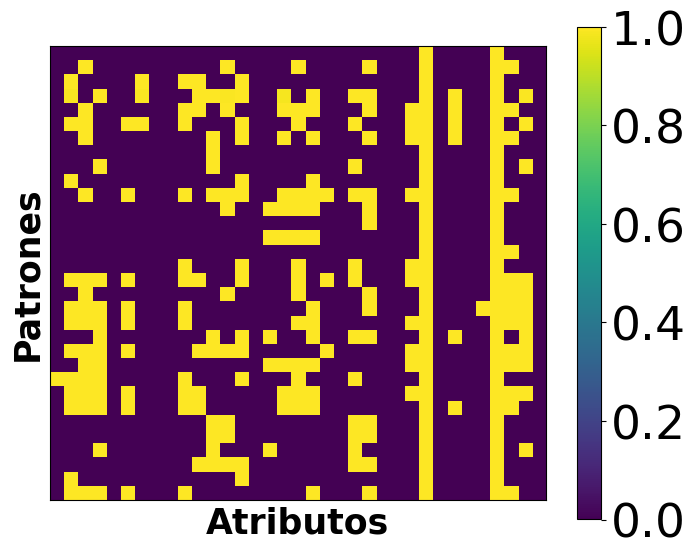

In [ ]:
Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1)
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_actual, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_candidato, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


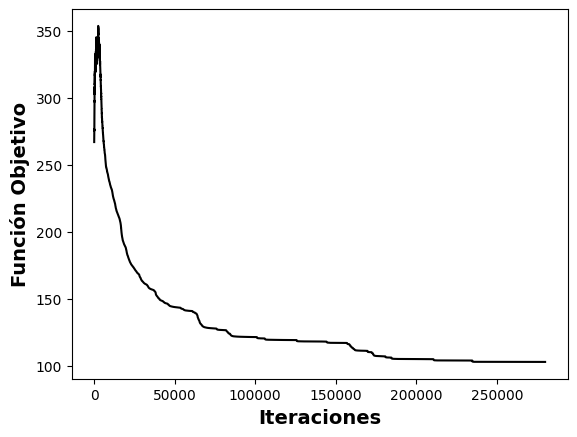

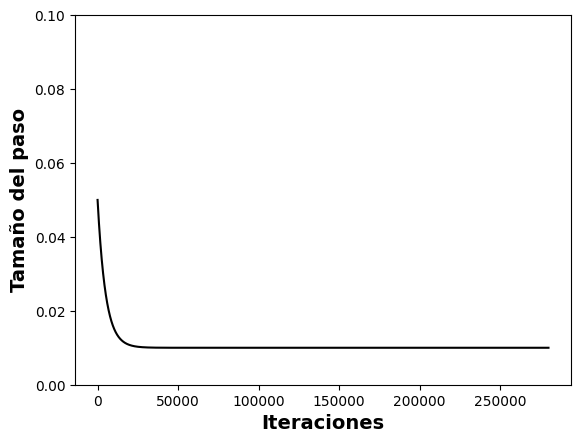

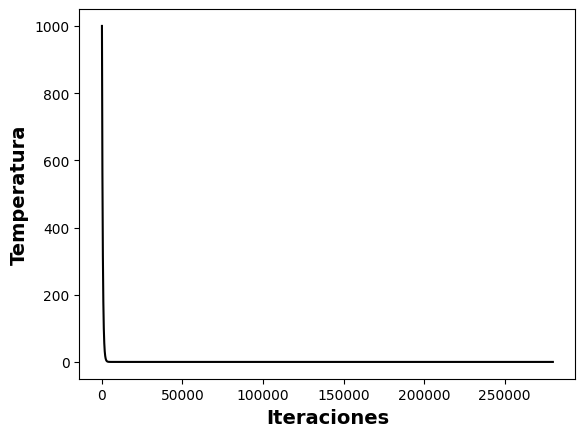

In [ ]:
#segundo paso

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.01)*np.exp(-i/5000)+0.01
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=W_encoder_actual.shape)*tamaño_paso
  W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=W_decoder_actual.shape)*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/500)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

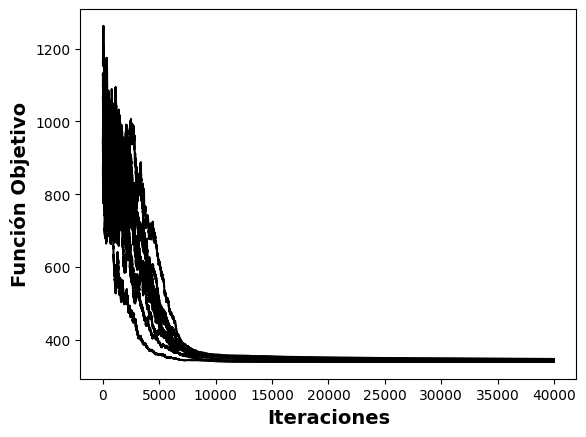

In [ ]:
#se cambia la semilla

# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red

fig, ax = plt.subplots()
for j in range (10):

  np.random.seed((j+1)*2)
  n_patrones, n_atributos = X_datos.shape
  n_neuronas_espacio_latente = 2

  neuronas_capa_oculta_encoder_1=10
  neuronas_capa_oculta_decoder_1=10

  W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
  W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))


  W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
  W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))


  def sigmoide(x):
      return 1 / (1 + np.exp(-x))

  #Se define la función objetivo
  def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida,W_E_CO_1,W_D_CO_1):

    Z1= np.dot(X_datos,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=sigmoide(Z2)

    Z3 =np.dot(Z2_act,W_D_CO_1)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_decoder_modelo_salida)




    error = np.abs(Z4 - X_datos)
    error_total= error.sum()

    return Z4,error_total

#-----------------------------------------------------------------------------------------------------------
  W_encoder_actual=W_encoder_entrada.copy()
  W_decoder_actual=W_decoder_salida.copy()

  W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
  W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()


  Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1)
  #se comienza las iteraciones
  iteraciones=40000
  tamaño_paso_inicial=0.05
  #se deefine la temperatura inicial
  t_inicial=1000
  Error_modelo= np.zeros(iteraciones)

  Probabilidad_p=np.zeros(iteraciones)
  tamaño_del_paso=np.zeros(iteraciones)
  Temperatura_T=np.zeros(iteraciones)

  for i in range(iteraciones):

    tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp(-i/5000)+0.001
    tamaño_del_paso[i]=tamaño_paso



  #se avanza un paso
    W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=W_encoder_actual.shape)*tamaño_paso
    W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=W_decoder_actual.shape)*tamaño_paso

    W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
    W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


  #se evalua el nuevo paso
    Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
    Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
    t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
    if Diferencia <0 :
      criterio=2
    if Diferencia >=0 :
      criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


    Probabilidad_p[i]=criterio
    Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
    ñ=abs(np.random.randn())
    if Diferencia < 0 or ñ< criterio:
      W_encoder_actual=W_encoder_candidato
      W_decoder_actual=W_decoder_candidato
      W_E_CO_1_actual=W_E_CO_1_candidato
      W_D_CO_1_actual=W_D_CO_1_candidato
      Error_actual=Error_candidato
    Error_modelo[i]=Error_actual


  ax.plot(Error_modelo, color='black')
  ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
  ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})


# **Modelo 5 aprendisaje variable, temperatura exponencial , 10 neuronas en capa oculta, activacion sigmoide, se incluye el bias**

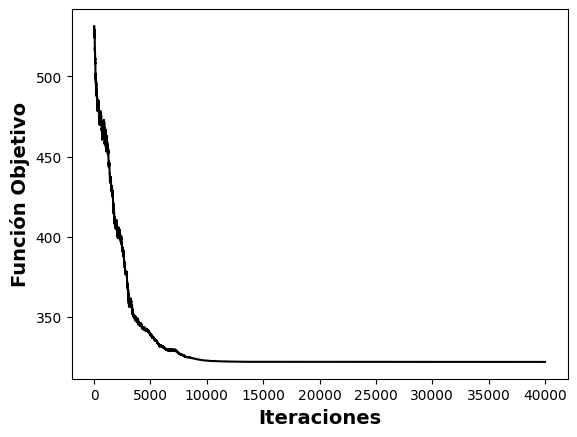

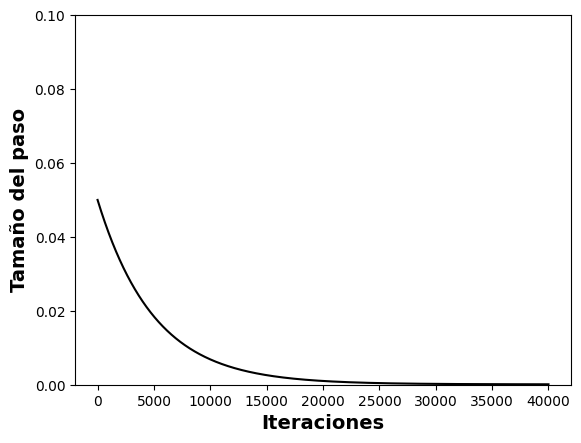

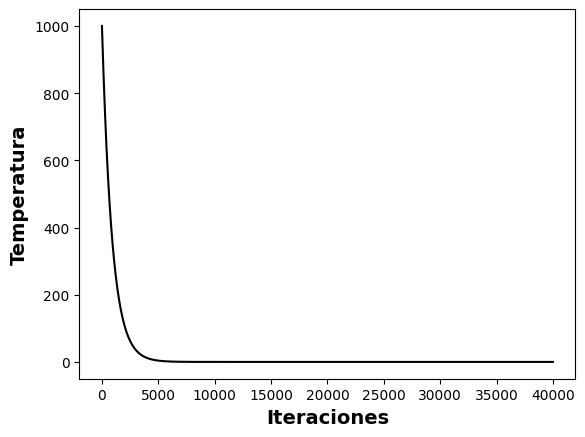

CPU times: user 16.1 s, sys: 342 ms, total: 16.4 s
Wall time: 19.3 s


In [ ]:
%%time
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1=64
neuronas_capa_oculta_decoder_1=64

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))


b_encoder_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1))
b_E_CO_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente))
b_D_CO_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1))
b_decoder_1=np.random.uniform(-1, 1, size=(n_atributos))

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def Funcion_objetivo_02(W_encoder_modelo_entrada, W_decoder_modelo_salida, W_E_CO_1, W_D_CO_1,
                        b_encoder_1, b_E_CO_1, b_D_CO_1, b_decoder_1):

    # Capa del encoder
    Z1 = np.dot(X_datos, W_encoder_modelo_entrada) + b_encoder_1
    Z1_act = sigmoide(Z1)

    # Espacio latente
    Z2 = np.dot(Z1_act, W_E_CO_1) + b_E_CO_1
    Z2_act = sigmoide(Z2)

    # Capa oculta del decoder
    Z3 = np.dot(Z2_act, W_D_CO_1) + b_D_CO_1
    Z3_act = sigmoide(Z3)

    # Capa de salida
    Z4 = np.dot(Z3_act, W_decoder_modelo_salida) + b_decoder_1
    Z4_act = sigmoide(Z4)

    error = np.abs(Z4_act - X_datos)
    error_total= error.sum()

    return Z4_act,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()


b_encoder_1_actual=b_encoder_1.copy()
b_E_CO_1_actual=b_E_CO_1.copy()
b_D_CO_1_actual=b_D_CO_1.copy()
b_decoder_1_actual=b_decoder_1.copy()


Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1,
                                           b_encoder_1, b_E_CO_1, b_D_CO_1, b_decoder_1)
#se comienza las iteraciones
iteraciones=40000
tamaño_paso_inicial=0.05
#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.0001)*np.exp(-i/5000)+0.0001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual + W_encoder_actual* np.random.uniform(-1, 1, size=W_encoder_actual.shape)*tamaño_paso
  W_decoder_candidato=W_decoder_actual + W_decoder_actual*np.random.uniform(-1, 1, size=W_decoder_actual.shape)*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual + W_E_CO_1_actual* np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_D_CO_1_candidato=W_D_CO_1_actual + W_D_CO_1_actual*np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


  b_encoder_1_candidato= b_encoder_1_actual +b_encoder_1_actual* np.random.uniform(-1, 1, size=b_encoder_1_actual.shape)*tamaño_paso
  b_E_CO_1_candidato= b_E_CO_1_actual + b_E_CO_1_actual*np.random.uniform(-1, 1, size=b_E_CO_1_actual.shape)*tamaño_paso
  b_D_CO_1_candidato= b_D_CO_1_actual + b_D_CO_1_actual*np.random.uniform(-1, 1, size=b_D_CO_1_actual.shape)*tamaño_paso
  b_decoder_1_candidato= b_decoder_1_actual + b_decoder_1_actual* np.random.uniform(-1, 1, size=b_decoder_1_actual.shape)*tamaño_paso




#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato,
                                                   b_encoder_1_candidato, b_E_CO_1_candidato, b_D_CO_1_candidato, b_decoder_1_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato

    b_encoder_1_actual= b_encoder_1_candidato
    b_E_CO_1_actual= b_E_CO_1_candidato
    b_D_CO_1_actual= b_D_CO_1_candidato
    b_decoder_1_actual= b_decoder_1_candidato

    Error_actual=Error_candidato



  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

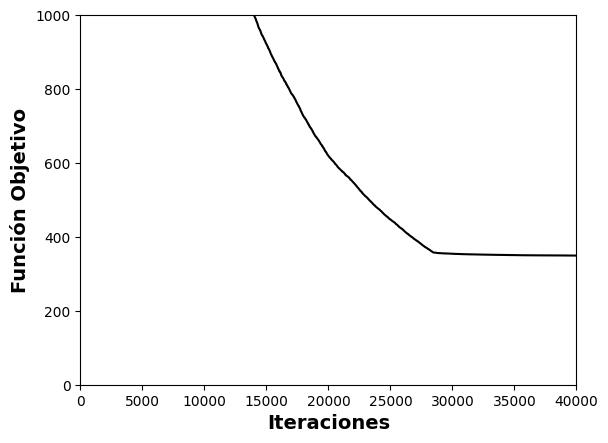

343.8733900557192


In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1000)
plt.xlim(0,40000)
plt.show()
print(Error_modelo[-1])

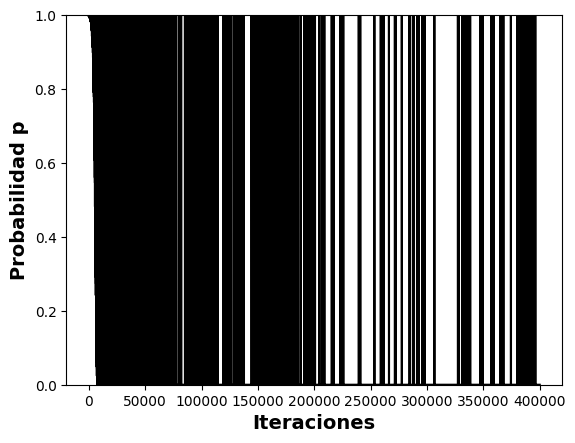

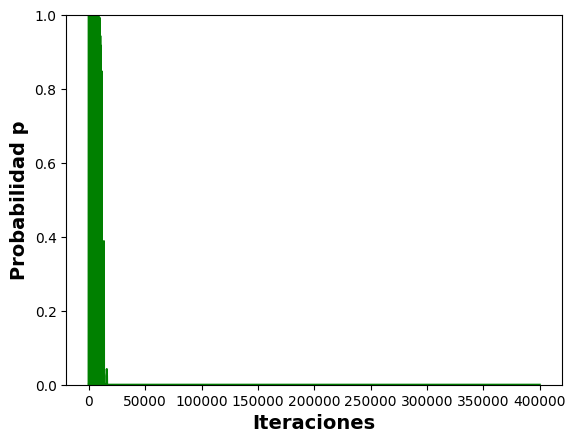

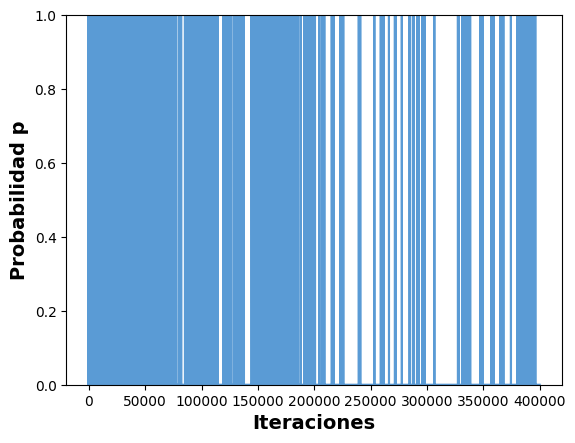

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

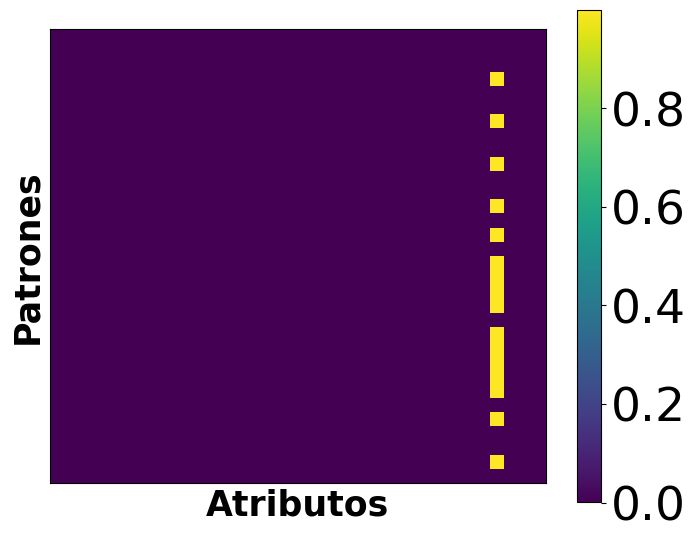

In [ ]:

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_candidato, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


<ipython-input-101-d202b0195238>:28: RuntimeWarning: overflow encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0
<ipython-input-101-d202b0195238>:28: RuntimeWarning: divide by zero encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


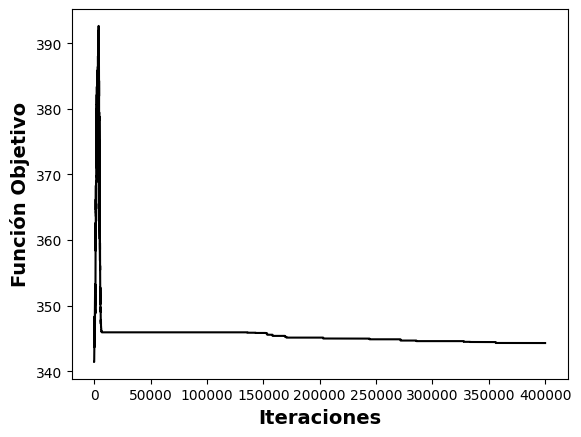

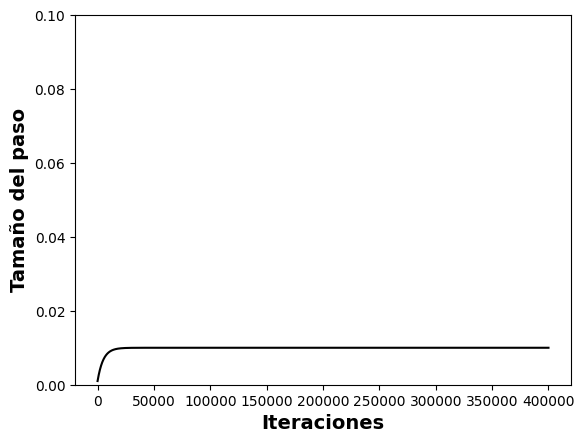

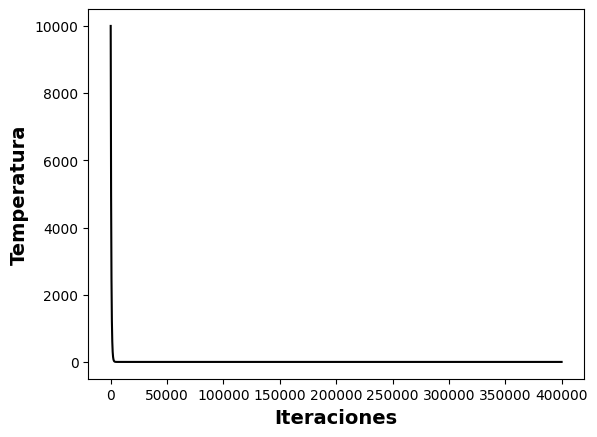

In [ ]:
#segundo paso

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.01)*np.exp(-i/5000)+0.01
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=W_encoder_actual.shape)*tamaño_paso
  W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=W_decoder_actual.shape)*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/500)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

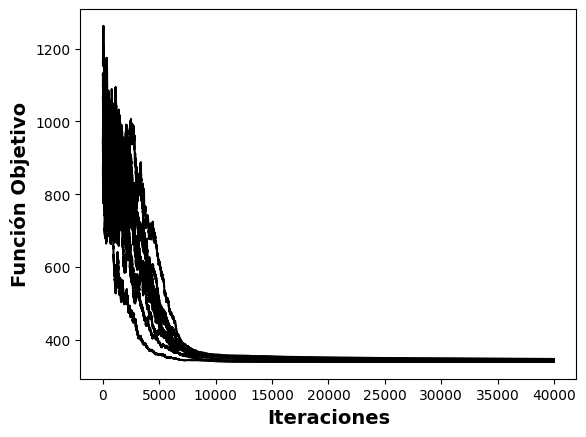

In [ ]:
#se cambia la semilla

# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red

fig, ax = plt.subplots()
for j in range (10):

  np.random.seed((j+1)*2)
  n_patrones, n_atributos = X_datos.shape
  n_neuronas_espacio_latente = 2

  neuronas_capa_oculta_encoder_1=10
  neuronas_capa_oculta_decoder_1=10

  W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
  W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))


  W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
  W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))


  def sigmoide(x):
      return 1 / (1 + np.exp(-x))

  #Se define la función objetivo
  def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida,W_E_CO_1,W_D_CO_1):

    Z1= np.dot(X_datos,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=sigmoide(Z2)

    Z3 =np.dot(Z2_act,W_D_CO_1)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_decoder_modelo_salida)




    error = np.abs(Z4 - X_datos)
    error_total= error.sum()

    return Z4,error_total

#-----------------------------------------------------------------------------------------------------------
  W_encoder_actual=W_encoder_entrada.copy()
  W_decoder_actual=W_decoder_salida.copy()

  W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
  W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()


  Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1)
  #se comienza las iteraciones
  iteraciones=40000
  tamaño_paso_inicial=0.05
  #se deefine la temperatura inicial
  t_inicial=1000
  Error_modelo= np.zeros(iteraciones)

  Probabilidad_p=np.zeros(iteraciones)
  tamaño_del_paso=np.zeros(iteraciones)
  Temperatura_T=np.zeros(iteraciones)

  for i in range(iteraciones):

    tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp(-i/5000)+0.001
    tamaño_del_paso[i]=tamaño_paso



  #se avanza un paso
    W_encoder_candidato=W_encoder_actual +  np.random.uniform(-1, 1, size=W_encoder_actual.shape)*tamaño_paso
    W_decoder_candidato=W_decoder_actual + np.random.uniform(-1, 1, size=W_decoder_actual.shape)*tamaño_paso

    W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
    W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


  #se evalua el nuevo paso
    Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
    Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
    t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
    if Diferencia <0 :
      criterio=2
    if Diferencia >=0 :
      criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


    Probabilidad_p[i]=criterio
    Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
    ñ=abs(np.random.randn())
    if Diferencia < 0 or ñ< criterio:
      W_encoder_actual=W_encoder_candidato
      W_decoder_actual=W_decoder_candidato
      W_E_CO_1_actual=W_E_CO_1_candidato
      W_D_CO_1_actual=W_D_CO_1_candidato
      Error_actual=Error_candidato
    Error_modelo[i]=Error_actual


  ax.plot(Error_modelo, color='black')
  ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
  ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})


# **se hace un histograma de inicializaciones**

In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
Errores_inicializados=[]
for j in range (1000000):
  np.random.seed(j)
  n_patrones, n_atributos = X_datos.shape
  n_neuronas_espacio_latente = 10

  neuronas_capa_oculta_encoder_1=64
  neuronas_capa_oculta_decoder_1=64

  W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
  W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))


  W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
  W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))


  def sigmoide(x):
      return 1 / (1 + np.exp(-x))

  #Se define la función objetivo
  def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida,W_E_CO_1,W_D_CO_1):

    Z1= np.dot(X_datos,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=sigmoide(Z2)

    Z3 =np.dot(Z2_act,W_D_CO_1)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_decoder_modelo_salida)
    Z4_act=sigmoide(Z4)



    error = np.abs(Z4_act - X_datos)
    error_total= error.sum()

    return Z4_act,error_total

#-----------------------------------------------------------------------------------------------------------


  Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1)

  Errores_inicializados.append(Error_actual)


CPU times: user 4min 23s, sys: 379 ms, total: 4min 23s
Wall time: 4min 36s


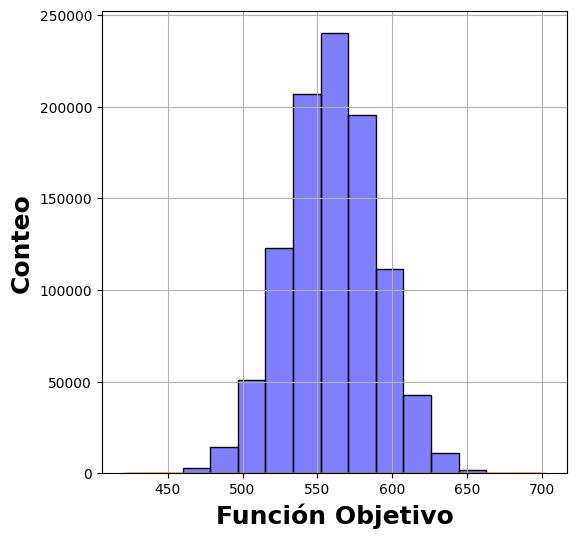

In [ ]:
plt.figure(figsize=(6, 6))

sns.histplot(Errores_inicializados, bins=15, kde=False, color='blue', alpha=0.5, label='Histograma')
sns.kdeplot(Errores_inicializados, bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')

plt.xlabel('Función Objetivo',fontweight='bold', fontsize=18)
plt.ylabel('Conteo', fontweight='bold', fontsize=18)
plt.grid()
plt.show()

# **Funcion objetivo con bucle for **

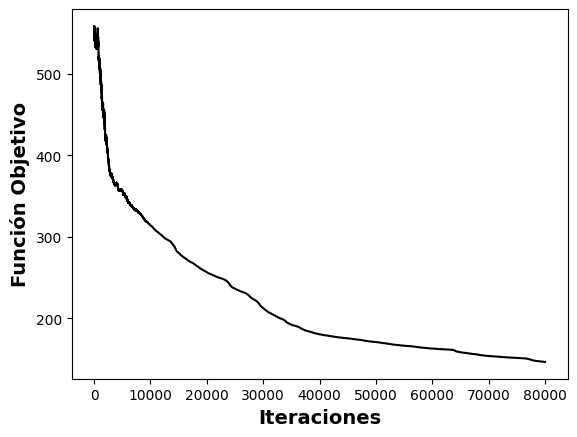

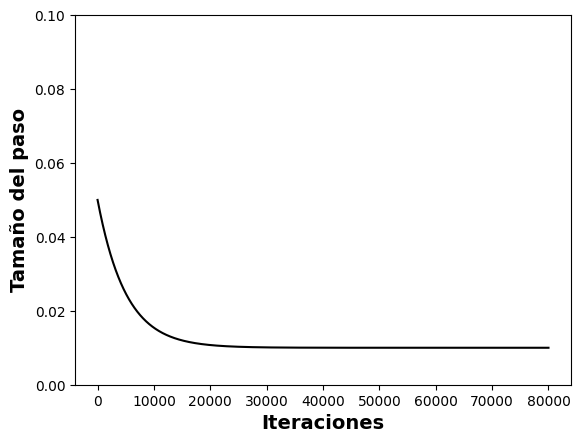

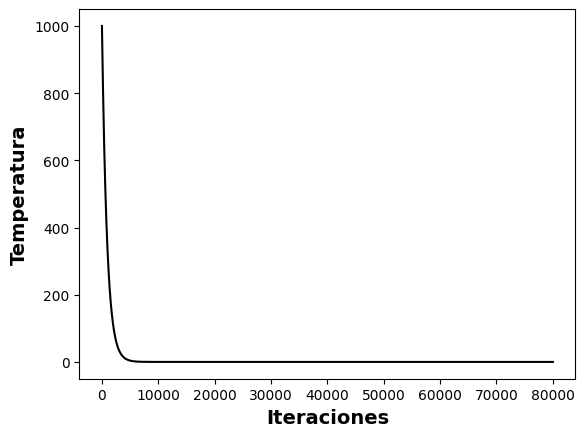

CPU times: user 2min 1s, sys: 1.29 s, total: 2min 2s
Wall time: 2min 2s


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 20

neuronas_capa_oculta_encoder_1=20
neuronas_capa_oculta_decoder_1=20

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,n_atributos))

W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,n_neuronas_espacio_latente))
W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))


def sigmoide(x):
    return 1 / (1 + np.exp(-x))

#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida,W_E_CO_1,W_D_CO_1):

  error_total_total=[]
  for k in range(n_patrones):
    X_patrones=X_datos[k,:].reshape(1,-1)

    Z1= np.dot(X_patrones,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=sigmoide(Z2)

    Z3 =np.dot(Z2_act,W_D_CO_1)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_decoder_modelo_salida)
    Z4_act=sigmoide(Z4)

    error = np.abs(Z4_act - X_patrones)
    error_total= error.sum()

    error_total_total.append(error_total)

  Error_final=np.sum(error_total_total)

  return Z4_act,Error_final

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()


Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida,W_encoder_capa_oculta_1,W_decoder_capa_oculta_1)
#se comienza las iteraciones
iteraciones=80000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.01)*np.exp(-i/5000)+0.01
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_D_CO_1_candidato=W_D_CO_1_actual +  np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato,W_E_CO_1_candidato,W_D_CO_1_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp(-i/900)
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

# **Modelo 7 se añade bias**

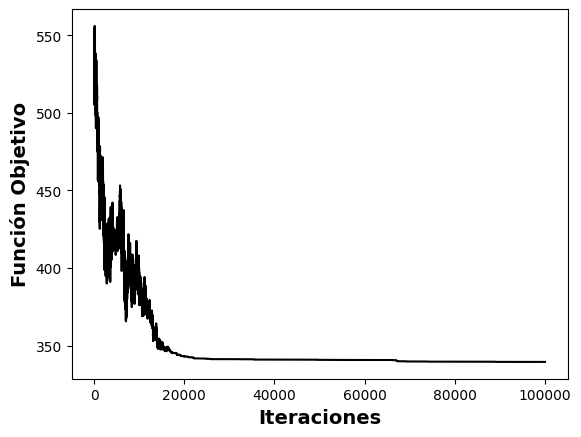

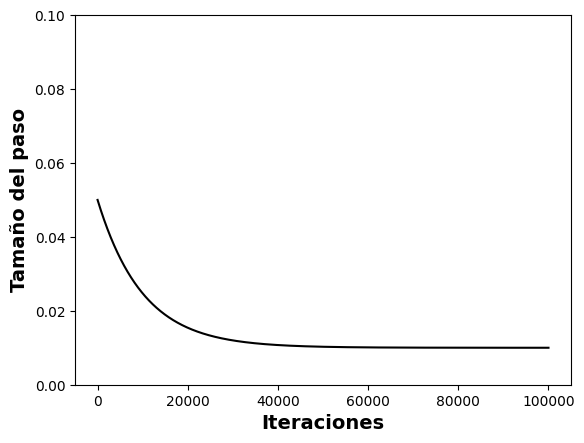

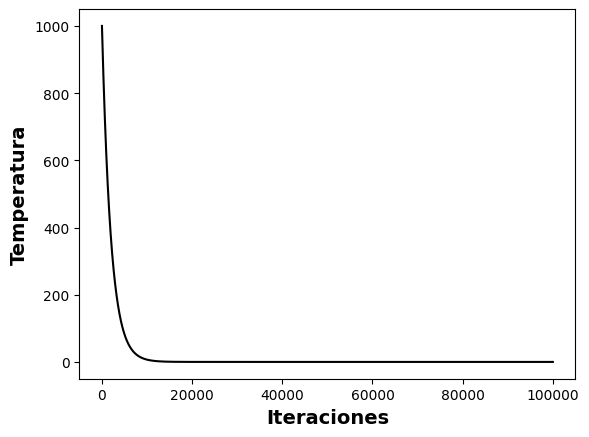

CPU times: user 1min 29s, sys: 454 ms, total: 1min 29s
Wall time: 1min 37s


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1=64
neuronas_capa_oculta_encoder_2=32
neuronas_capa_oculta_encoder_3=16
neuronas_capa_oculta_decoder_1=16
neuronas_capa_oculta_decoder_2=32
neuronas_capa_oculta_decoder_3=64

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))

b_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1))
b_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2))
b_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3))
b_4=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente))
b_5=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1))
b_6=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2))
b_7=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3))
b_8=np.random.uniform(-1, 1, size=(n_atributos))

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3
                        ,b1,b2,b3,b4,b5,b6,b7,b8):


  Z1= np.dot(X_datos,W_encoder_modelo_entrada)
  Z11=Z1 + b1
  Z1_act=tanh(Z11)

  Z2 =np.dot(Z1_act,W_E_CO_1)
  Z22=Z2 +b2
  Z2_act=sigmoide(Z22)

  Z3 =np.dot(Z2_act,W_E_CO_2)
  Z33=Z3 + b3
  Z3_act=tanh(Z33)

  Z4 =np.dot(Z3_act,W_E_CO_3)
  Z44=Z4 + b4
  Z4_act=sigmoide(Z44)

  Z5 =np.dot(Z4_act,W_D_CO_1)
  Z55=Z5 + b5
  Z5_act=tanh(Z55)

  Z6 =np.dot(Z5_act,W_D_CO_2)
  Z66=Z6+b6
  Z6_act=sigmoide(Z66)

  Z7 =np.dot(Z6_act,W_D_CO_3)
  Z77=Z7+b7
  Z7_act=tanh(Z77)

  Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
  Z88=Z8
  Z8_act=sigmoide(Z88)

  error = np.abs(Z8_act - X_datos)
  error_total= error.sum()

  return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()

b1_actual=b_1.copy()
b2_actual=b_2.copy()
b3_actual=b_3.copy()
b4_actual=b_4.copy()
b5_actual=b_5.copy()
b6_actual=b_6.copy()
b7_actual=b_7.copy()
b8_actual=b_8.copy()



Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                           ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)


Y_inicial,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                          ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)

#se comienza las iteraciones
iteraciones=100000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.01)*np.exp((-i/iteraciones )*(10))+0.01
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

<timed exec>:29: RuntimeWarning: overflow encountered in exp


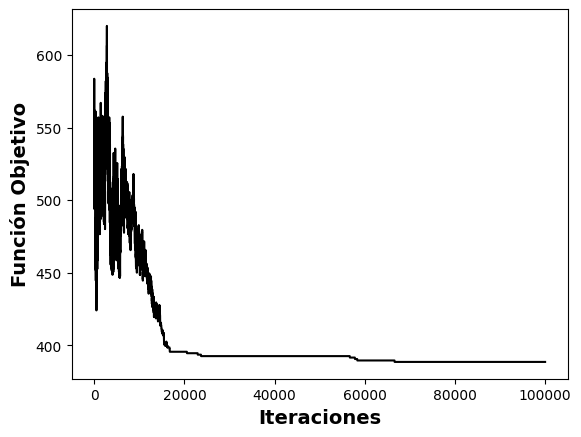

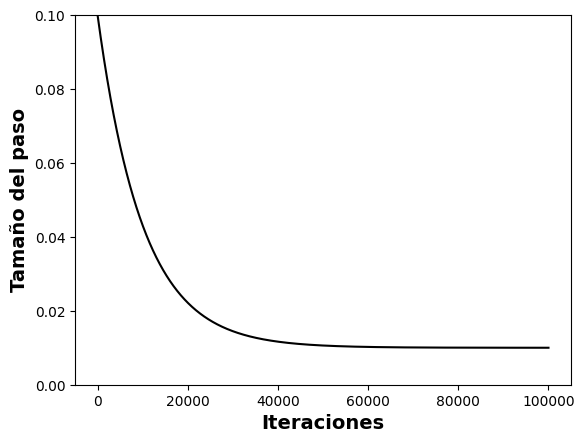

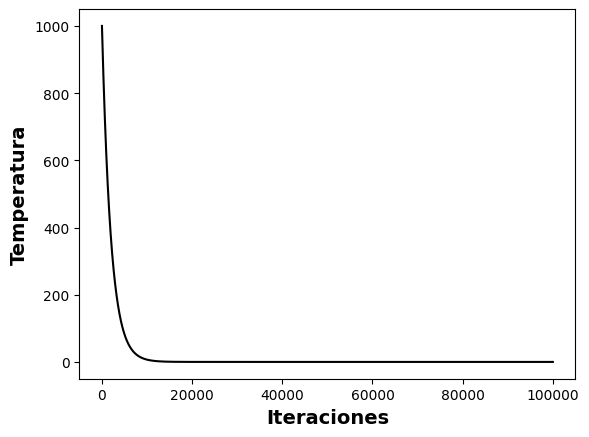

CPU times: user 38.4 s, sys: 386 ms, total: 38.8 s
Wall time: 38.8 s


In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1=64
neuronas_capa_oculta_encoder_2=32
neuronas_capa_oculta_encoder_3=16
neuronas_capa_oculta_decoder_1=16
neuronas_capa_oculta_decoder_2=32
neuronas_capa_oculta_decoder_3=64

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))


def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3):

  Z1= np.dot(X_datos,W_encoder_modelo_entrada)
  Z1_act=relu(Z1)

  Z2 =np.dot(Z1_act,W_E_CO_1)
  Z2_act=relu(Z2)

  Z3 =np.dot(Z2_act,W_E_CO_2)
  Z3_act=relu(Z3)

  Z4 =np.dot(Z3_act,W_E_CO_3)
  Z4_act=relu(Z4)

  Z5 =np.dot(Z4_act,W_D_CO_1)
  Z5_act=relu(Z5)

  Z6 =np.dot(Z5_act,W_D_CO_2)
  Z6_act=relu(Z6)

  Z7 =np.dot(Z6_act,W_D_CO_3)
  Z7_act=relu(Z7)

  Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
  Z8_act=sigmoide(Z8)

  error = np.abs(Z8_act- X_datos)
  error_total= error.sum()

  return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()


Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3)


Y_inicial,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3)

#se comienza las iteraciones
iteraciones=100000
tamaño_paso_inicial=0.1

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.01)*np.exp((-i/iteraciones )*(10))+0.01
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

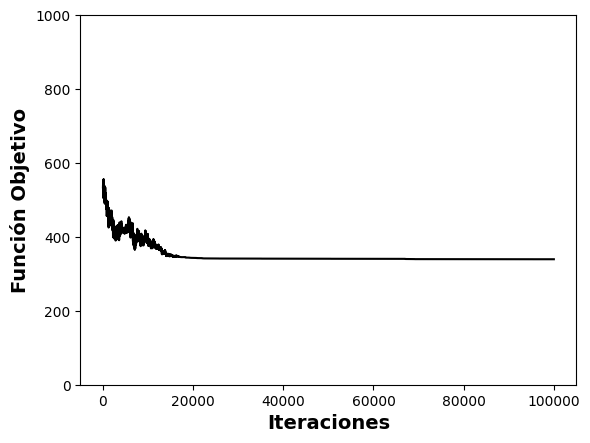

339.5003273213203


In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1000)
#plt.xlim(0,80000)
plt.show()
print(Error_modelo[-1])

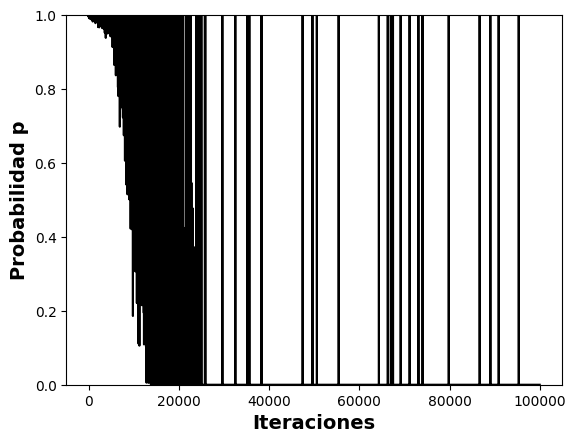

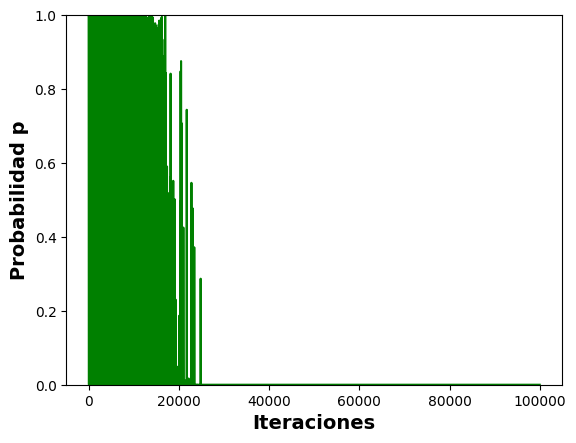

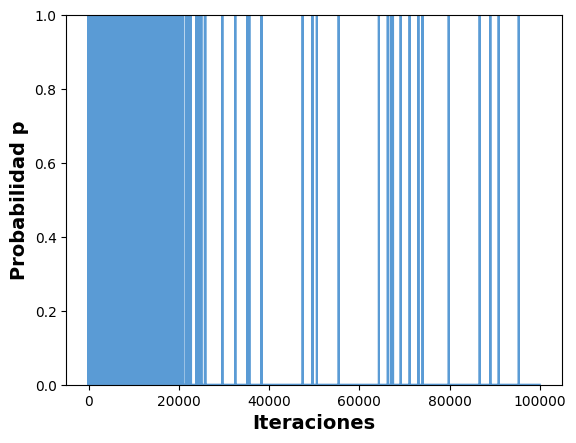

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

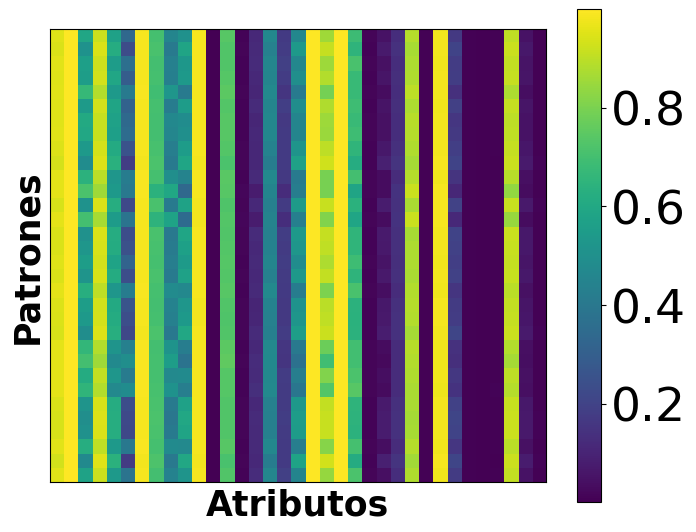

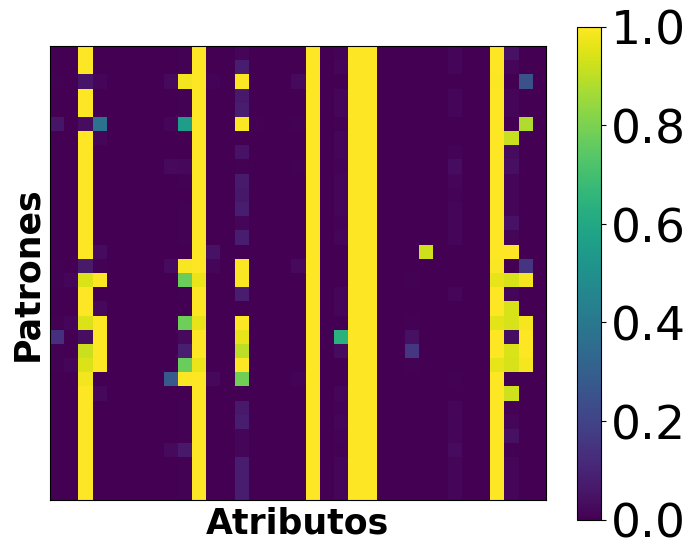

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_inicial, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_candidato, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


<timed exec>:29: RuntimeWarning: overflow encountered in exp
<ipython-input-44-10cf8f73da82>:47: RuntimeWarning: overflow encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0
<ipython-input-44-10cf8f73da82>:47: RuntimeWarning: invalid value encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0
<ipython-input-44-10cf8f73da82>:47: RuntimeWarning: divide by zero encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


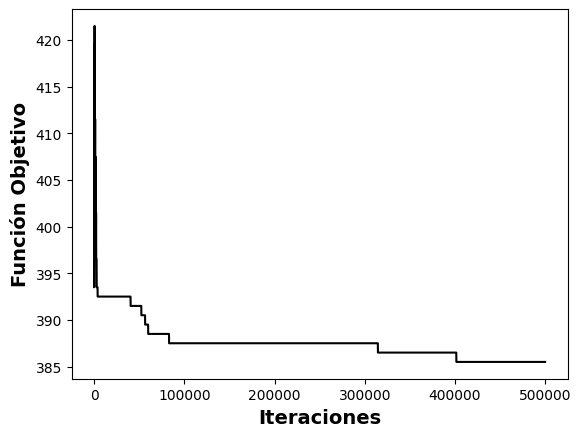

In [ ]:
#segundo paso

#se comienza las iteraciones
iteraciones=500000
tamaño_paso_inicial=0.01

#se deefine la temperatura inicial
t_inicial=10
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(900))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()




In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
Errores_inicializados=[]
for j in range (100000):

  np.random.seed(j)
  n_patrones, n_atributos = X_datos.shape

  n_neuronas_espacio_latente = 20

  neuronas_capa_oculta_encoder_1=60
  neuronas_capa_oculta_encoder_2=60
  neuronas_capa_oculta_encoder_3=60
  neuronas_capa_oculta_decoder_1=60
  neuronas_capa_oculta_decoder_2=60
  neuronas_capa_oculta_decoder_3=60

  W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
  W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


  W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
  W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
  W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


  W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
  W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
  W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))


  def sigmoide(x):
      return 1 / (1 + np.exp(-x))

  def tanh(x):
      return np.tanh(x)

  #Se define la función objetivo
  def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3):

    Z1= np.dot(X_datos,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=tanh(Z2)

    Z3 =np.dot(Z2_act,W_E_CO_2)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_E_CO_3)
    Z4_act=tanh(Z4)


    Z5 =np.dot(Z4_act,W_D_CO_1)
    Z5_act=sigmoide(Z5)

    Z6 =np.dot(Z5_act,W_D_CO_2)
    Z6_act=tanh(Z6)

    Z7 =np.dot(Z6_act,W_D_CO_3)
    Z7_act=sigmoide(Z7)

    Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
    Z8_act=tanh(Z8)

    error = np.abs(Z8 - X_datos)
    error_total= error.sum()

    return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
  W_encoder_actual=W_encoder_entrada.copy()
  W_decoder_actual=W_decoder_salida.copy()

  W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
  W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
  W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


  W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
  W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
  W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()


  Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3)



  Errores_inicializados.append(Error_actual)

CPU times: user 1min 36s, sys: 184 ms, total: 1min 36s
Wall time: 1min 51s


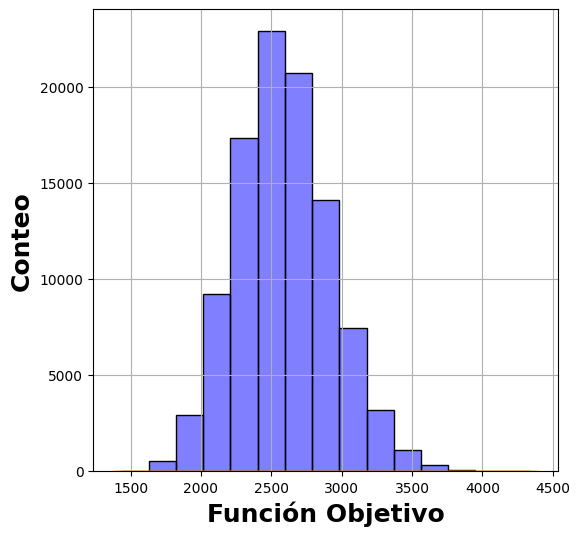

In [ ]:
plt.figure(figsize=(6, 6))

sns.histplot(Errores_inicializados, bins=15, kde=False, color='blue', alpha=0.5, label='Histograma')
sns.kdeplot(Errores_inicializados, bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')

plt.xlabel('Función Objetivo',fontweight='bold', fontsize=18)
plt.ylabel('Conteo', fontweight='bold', fontsize=18)
plt.grid()
plt.show()

# **Modelo 8 se añade bias**

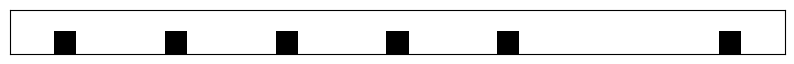

In [61]:

X_datos= []

for pattern in font_1:
    patron = np.zeros((7, 5), dtype=int)
    #se obtiene el patron
    for row in range(7):
        for col in range(5):
            patron[row, col] = (pattern[row] >> (4 - col)) & 1

    # se pasa a un vector
    patron_aplanado = patron.flatten()

    # se añade a la matriz de datos
    X_datos.append(patron_aplanado)

X_datos = np.array(X_datos)

X_datos=X_datos[:2]

# Se grafica los patrones
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(X_datos, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


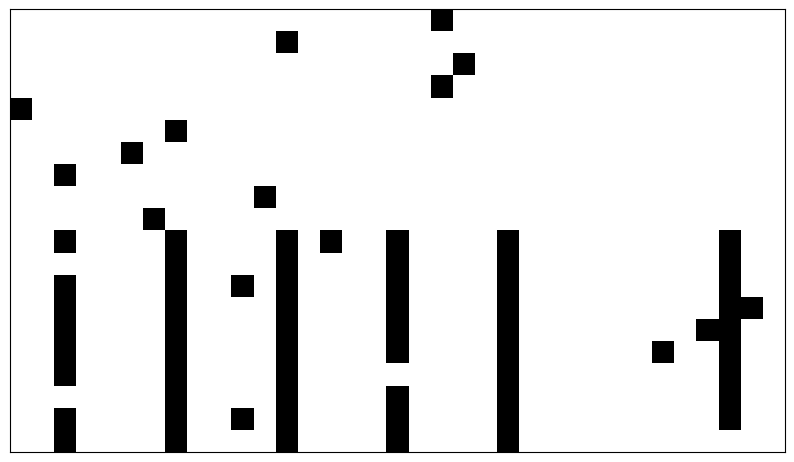

In [90]:
def cambiar_pixel(patron):
    idx = np.random.randint(0, len(patron))
    patron_modificado = patron.copy()
    patron_modificado[idx] = 1 - patron_modificado[idx]
    return patron_modificado

patrones1 = [cambiar_pixel(X_datos[0]) for _ in range(20)]

patrones2 = [cambiar_pixel(X_datos[1]) for _ in range(20)]

patrones1 = np.array(patrones1)
patrones2 = np.array(patrones2)

matriz_extraida1 = patrones1[:10,:]
matriz_extraida2 = patrones2[:10,:]

matriz_restante1 = patrones1[10:,:]
matriz_restante2= patrones2[10:,:]

matriz_final = np.concatenate((matriz_restante1, matriz_restante2), axis=0)

matriz_validacion=np.concatenate((matriz_extraida1,matriz_extraida2), axis=0)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(matriz_validacion , cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

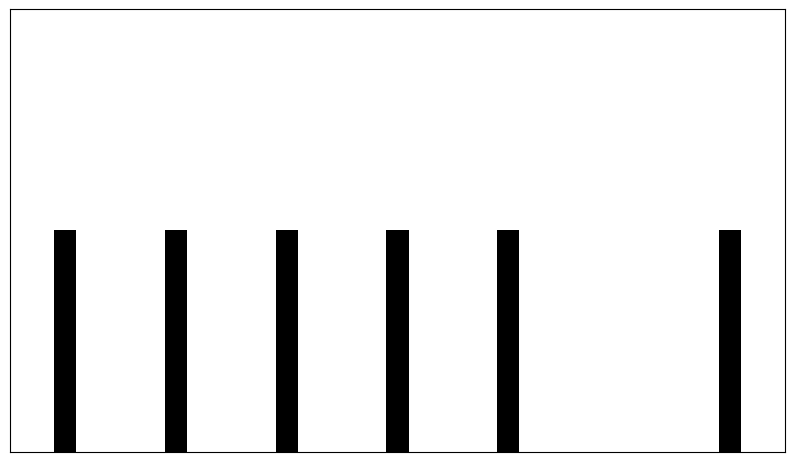

In [71]:

patrones1 = np.tile(X_datos[0,:], (10, 1))

# Repetir el patrón 2 10 veces
patrones2 = np.tile(X_datos[1,:], (10, 1))

# Combinar ambos patrones en una matriz de 20x35
matriz_referencia = np.vstack([patrones1, patrones2])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(matriz_referencia, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

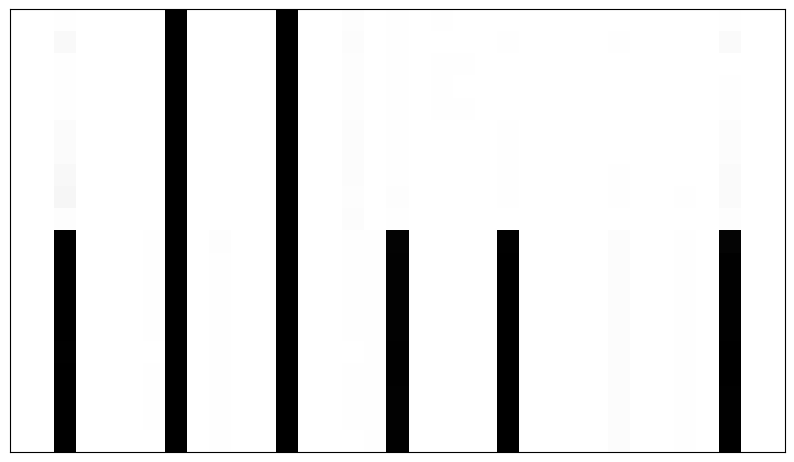

In [95]:
  matriz_final=matriz_validacion.copy()
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)

  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(Y_candidato, cmap='Greys', interpolation='nearest')
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

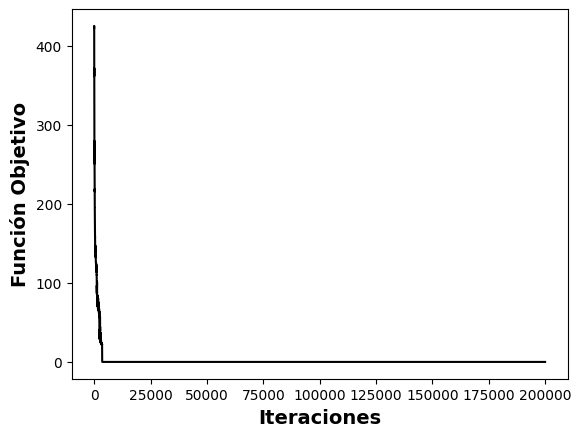

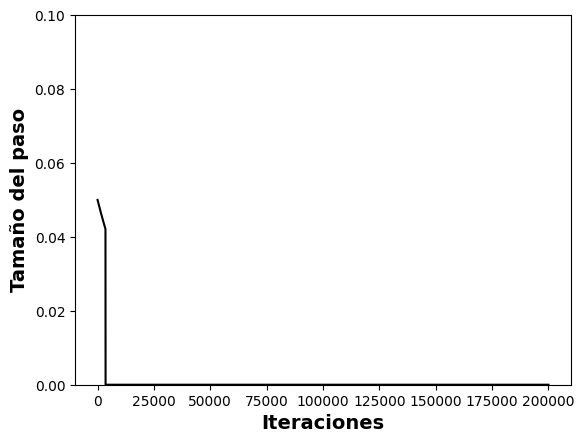

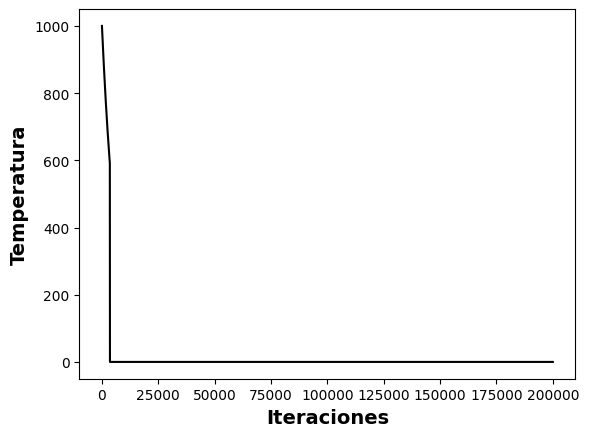

CPU times: user 3.35 s, sys: 149 ms, total: 3.5 s
Wall time: 6.19 s


In [91]:
%%time

np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1=40
neuronas_capa_oculta_encoder_2=20
neuronas_capa_oculta_encoder_3=8
neuronas_capa_oculta_decoder_1=8
neuronas_capa_oculta_decoder_2=20
neuronas_capa_oculta_decoder_3=40

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))

b_1=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_encoder_1))
b_2=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_encoder_2))
b_3=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_encoder_3))
b_4=np.random.uniform(0,0.1, size=(n_neuronas_espacio_latente))
b_5=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_decoder_1))
b_6=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_decoder_2))
b_7=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_decoder_3))
b_8=np.random.uniform(0,0.1, size=(n_atributos))

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3
                        ,b1,b2,b3,b4,b5,b6,b7,b8):


  Z1= np.dot(X_datos,W_encoder_modelo_entrada)
  Z11=Z1 + b1
  Z1_act=tanh(Z11)

  Z2 =np.dot(Z1_act,W_E_CO_1)
  Z22=Z2 +b2
  Z2_act=sigmoide(Z22)

  Z3 =np.dot(Z2_act,W_E_CO_2)
  Z33=Z3 + b3
  Z3_act=tanh(Z33)

  Z4 =np.dot(Z3_act,W_E_CO_3)
  Z44=Z4 + b4
  Z4_act=Z44

  Z5 =np.dot(Z4_act,W_D_CO_1)
  Z55=Z5 + b5
  Z5_act=tanh(Z55)

  Z6 =np.dot(Z5_act,W_D_CO_2)
  Z66=Z6+b6
  Z6_act=sigmoide(Z66)

  Z7 =np.dot(Z6_act,W_D_CO_3)
  Z77=Z7+b7
  Z7_act=tanh(Z77)

  Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
  Z88=Z8
  Z8_act=sigmoide(Z88)




  #matriz_resultado = (Y_candidato > 0.5).astype(int)
  error = np.abs(Z8_act - X_datos)
  #comparacion2 = (X_datos != matriz_resultado).astype(int)

  #error_faltante = error * comparacion2
  #error_faltante_total= error_faltante.sum()

  #resultado_acertado = (X_datos == matriz_resultado).astype(int)
  #resultado_acertado_total= resultado_acertado.sum()
  #diferentes = (X_datos != matriz_resultado).sum()
  error_total_datos= error.sum()
  error_total=(error_total_datos) #+diferentes






  return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()

b1_actual=b_1.copy()
b2_actual=b_2.copy()
b3_actual=b_3.copy()
b4_actual=b_4.copy()
b5_actual=b_5.copy()
b6_actual=b_6.copy()
b7_actual=b_7.copy()
b8_actual=b_8.copy()



Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                           ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)


Y_inicial,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                          ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)

#se comienza las iteraciones
iteraciones=200000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(30))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=0.2*(math.exp(-(Diferencia/t))) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual


  if i==3500:
    break

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

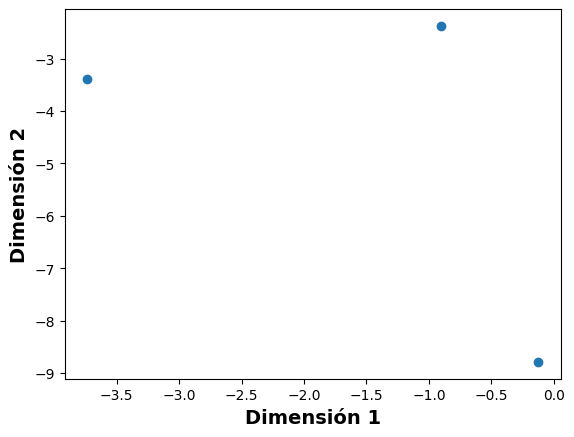

In [35]:
Z1= np.dot(X_datos,W_encoder_actual)
Z11=Z1 + b1_actual
Z1_act=tanh(Z11)

Z2 =np.dot(Z1_act,W_E_CO_1_actual)
Z22=Z2 +b2_actual
Z2_act=sigmoide(Z22)

Z3 =np.dot(Z2_act,W_E_CO_2_actual)
Z33=Z3 + b3_actual
Z3_act=tanh(Z33)

Z4 =np.dot(Z3_act,W_E_CO_3_actual)
Z44=Z4 + b4_actual
Z4_act=Z44

Z5 =np.dot(Z4_act,W_D_CO_1_actual)
Z55=Z5 + b5_actual
Z5_act=tanh(Z55)

Z6 =np.dot(Z5_act,W_D_CO_2_actual)
Z66=Z6+b6_actual
Z6_act=sigmoide(Z66)

Z7 =np.dot(Z6_act,W_D_CO_3_actual)
Z77=Z7+b7_actual
Z7_act=tanh(Z77)

Z8 =np.dot(Z7_act,W_decoder_actual)
Z88=Z8
Z8_act=sigmoide(Z88)


plt.scatter(Z4_act[:, 0],Z4_act[:, 1])
plt.xlabel("Dimensión 1", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})  # Etiqueta del eje x
plt.ylabel("Dimensión 2", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})  # Etiqueta del eje y
plt.show()

[[-0.89987915 -2.37312936]
 [-3.7336856  -3.38909746]
 [-0.12570436 -8.78911843]]


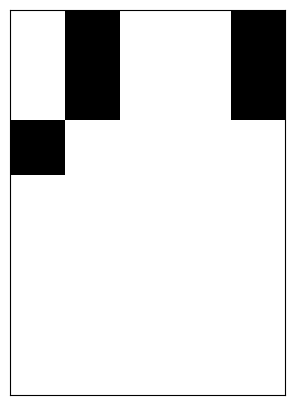

In [60]:
Z5 =np.dot([-1.5,-6],W_D_CO_1_actual)
Z55=Z5 + b5_actual
Z5_act=tanh(Z55)

Z6 =np.dot(Z5_act,W_D_CO_2_actual)
Z66=Z6+b6_actual
Z6_act=sigmoide(Z66)

Z7 =np.dot(Z6_act,W_D_CO_3_actual)
Z77=Z7+b7_actual
Z7_act=tanh(Z77)

Z8 =np.dot(Z7_act,W_decoder_actual)
Z88=Z8
Z8_act=sigmoide(Z88)


Z8_act_reshaped = Z8_act.reshape(7, 5)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(Z8_act_reshaped, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

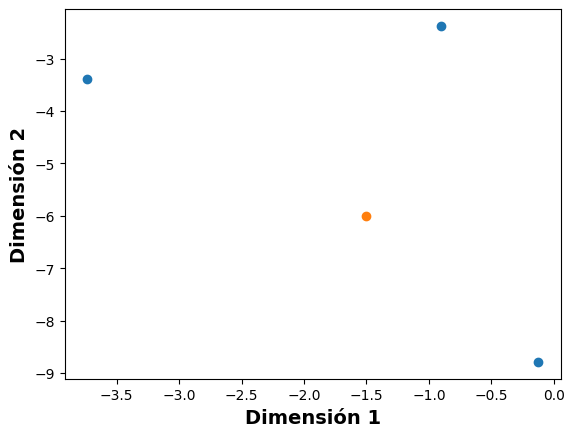

In [59]:
plt.scatter(Z4_act[:, 0],Z4_act[:, 1])
plt.scatter(-1.5,-6)
plt.xlabel("Dimensión 1", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylabel("Dimensión 2", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

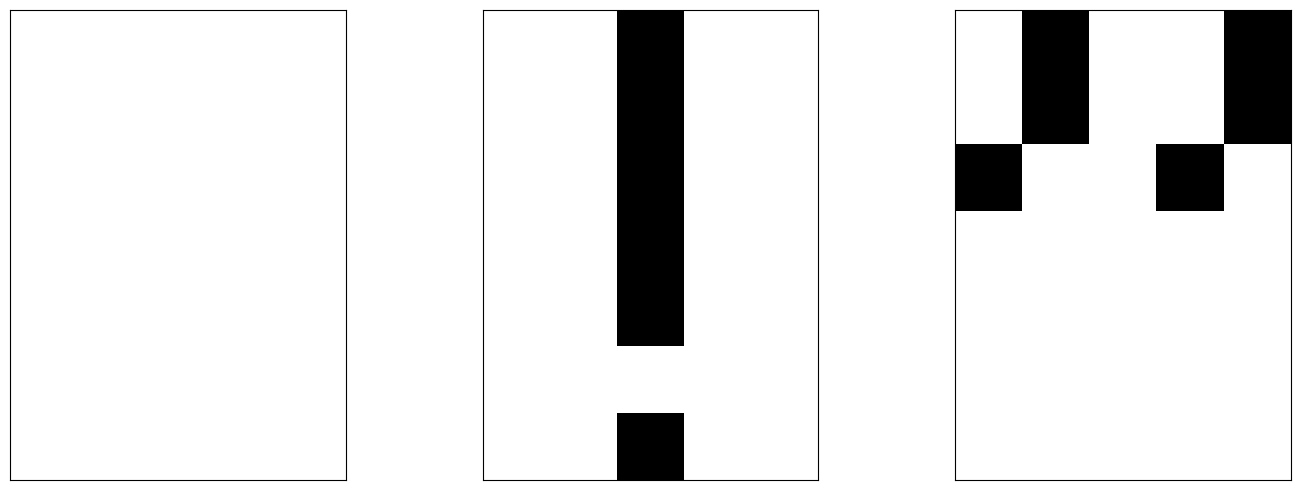

In [44]:
X_datos_reshaped = X_datos.reshape(3, 7, 5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(X_datos_reshaped[i], cmap='Greys', interpolation='nearest')
    axs[i].set_xticks([])
    axs[i].set_yticks([])


plt.tight_layout()
plt.show()

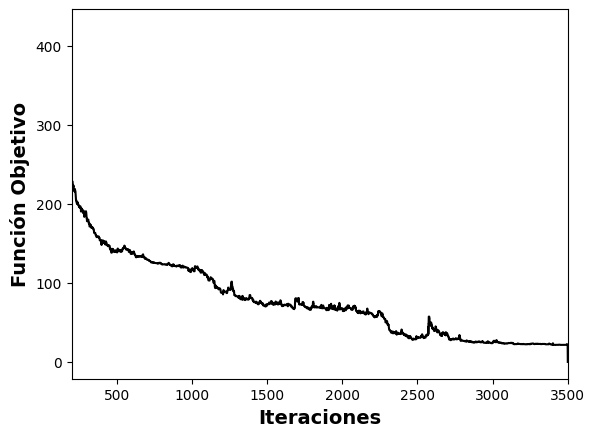

0.0


In [93]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
#plt.ylim(0,20)
plt.xlim(200,3500)
plt.show()
print(Error_modelo[-1])

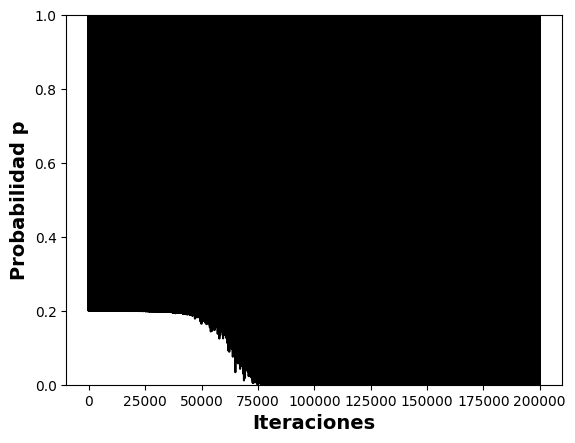

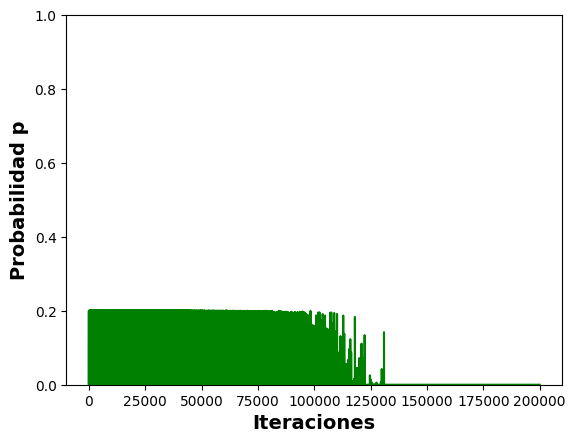

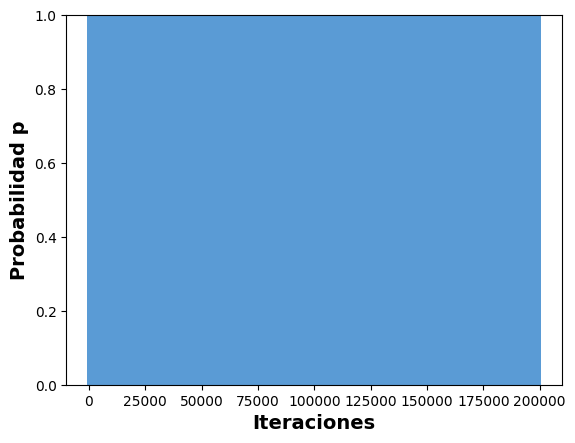

In [ ]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

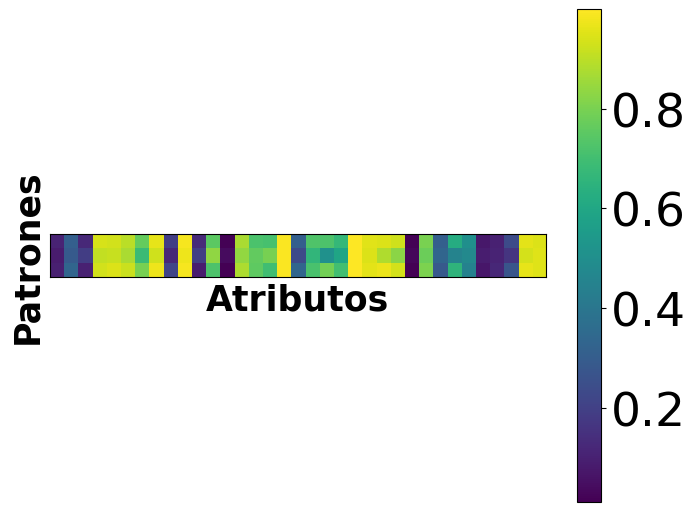

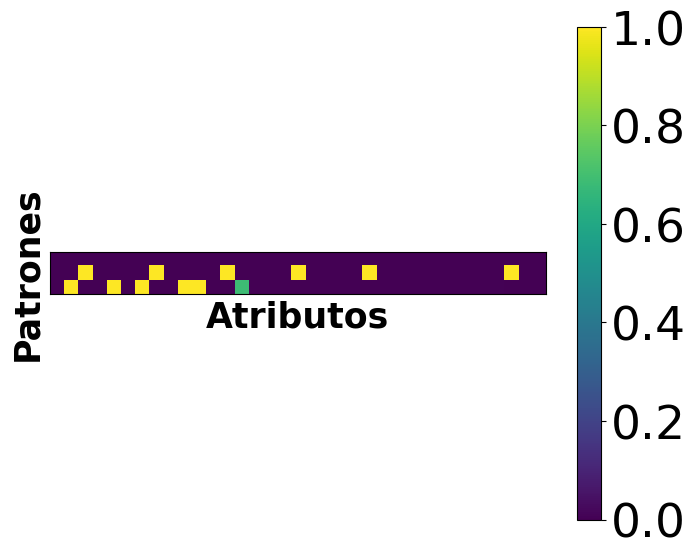

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_inicial, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_candidato, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


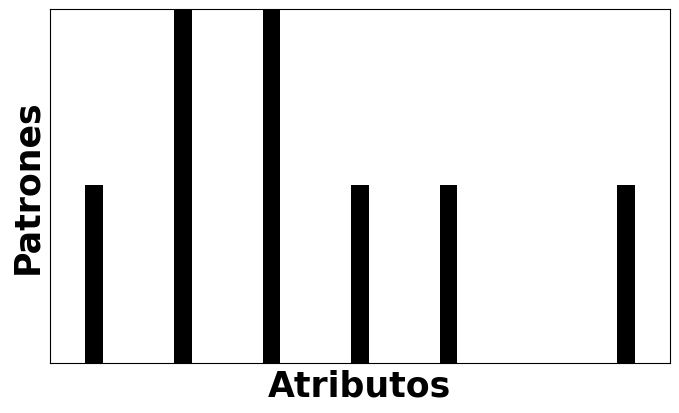

ValueError: operands could not be broadcast together with shapes (2,35) (20,35) 

In [94]:
matriz_resultado = (Y_candidato > 0.5).astype(int)
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(matriz_resultado, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


comparacion = X_datos != matriz_resultado

no_coinciden_por_fila = comparacion.sum(axis=1)

plt.bar(range(1, len(no_coinciden_por_fila) + 1), no_coinciden_por_fila)

plt.xlabel('Patrones', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylabel('Predicciones incorrectas', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

plt.show()



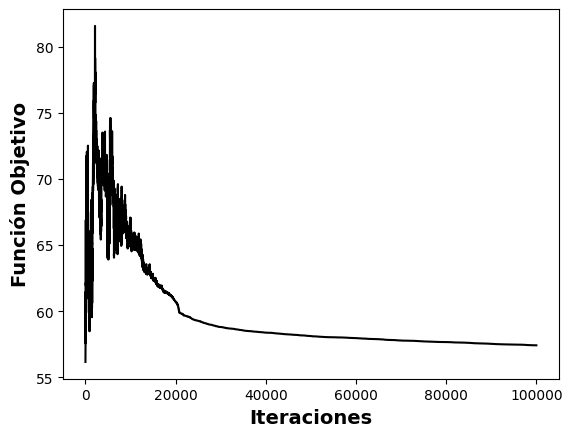

In [9]:
#se comienza las iteraciones
iteraciones=100000
tamaño_paso_inicial=0.005

#se deefine la temperatura inicial
t_inicial=100
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

In [33]:
#se comienza las iteraciones
iteraciones=100000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=100
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 :
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

KeyboardInterrupt: 

In [11]:
#segundo paso

#se comienza las iteraciones
iteraciones=100000
tamaño_paso_inicial=0.01

#se deefine la temperatura inicial
t_inicial=10
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(900))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()




TypeError: Funcion_objetivo_02() missing 8 required positional arguments: 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', and 'b8'

In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
Errores_inicializados=[]
for j in range (100000):

  np.random.seed(j)
  n_patrones, n_atributos = X_datos.shape

  n_neuronas_espacio_latente = 20

  neuronas_capa_oculta_encoder_1=60
  neuronas_capa_oculta_encoder_2=60
  neuronas_capa_oculta_encoder_3=60
  neuronas_capa_oculta_decoder_1=60
  neuronas_capa_oculta_decoder_2=60
  neuronas_capa_oculta_decoder_3=60

  W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
  W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


  W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
  W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
  W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


  W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
  W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
  W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))


  def sigmoide(x):
      return 1 / (1 + np.exp(-x))

  def tanh(x):
      return np.tanh(x)

  #Se define la función objetivo
  def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3):

    Z1= np.dot(X_datos,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=tanh(Z2)

    Z3 =np.dot(Z2_act,W_E_CO_2)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_E_CO_3)
    Z4_act=tanh(Z4)


    Z5 =np.dot(Z4_act,W_D_CO_1)
    Z5_act=sigmoide(Z5)

    Z6 =np.dot(Z5_act,W_D_CO_2)
    Z6_act=tanh(Z6)

    Z7 =np.dot(Z6_act,W_D_CO_3)
    Z7_act=sigmoide(Z7)

    Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
    Z8_act=tanh(Z8)

    error = np.abs(Z8 - X_datos)
    error_total= error.sum()

    return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
  W_encoder_actual=W_encoder_entrada.copy()
  W_decoder_actual=W_decoder_salida.copy()

  W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
  W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
  W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


  W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
  W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
  W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()


  Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3)



  Errores_inicializados.append(Error_actual)

CPU times: user 1min 36s, sys: 184 ms, total: 1min 36s
Wall time: 1min 51s


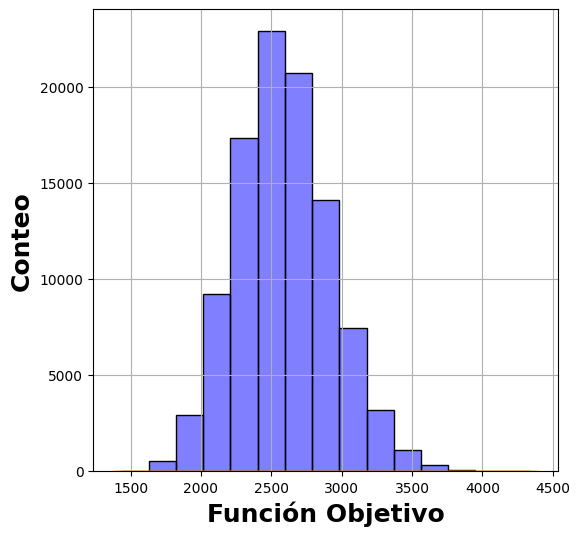

In [ ]:
plt.figure(figsize=(6, 6))

sns.histplot(Errores_inicializados, bins=15, kde=False, color='blue', alpha=0.5, label='Histograma')
sns.kdeplot(Errores_inicializados, bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')

plt.xlabel('Función Objetivo',fontweight='bold', fontsize=18)
plt.ylabel('Conteo', fontweight='bold', fontsize=18)
plt.grid()
plt.show()

# **Modelo 9 se cambia la función objetivo**

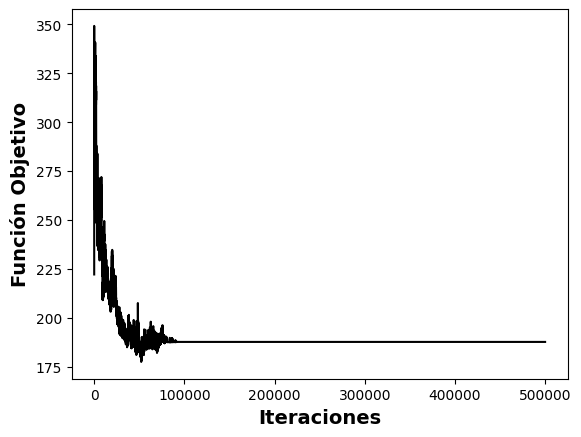

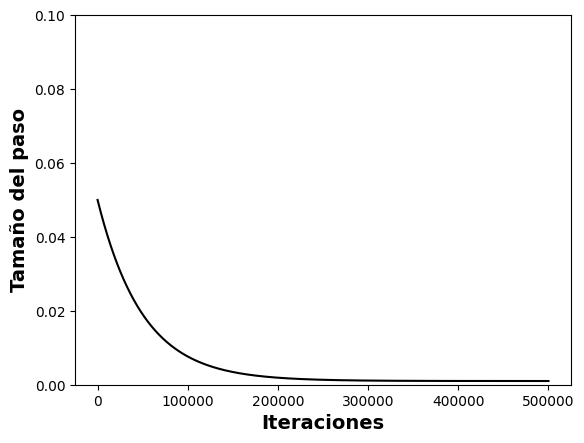

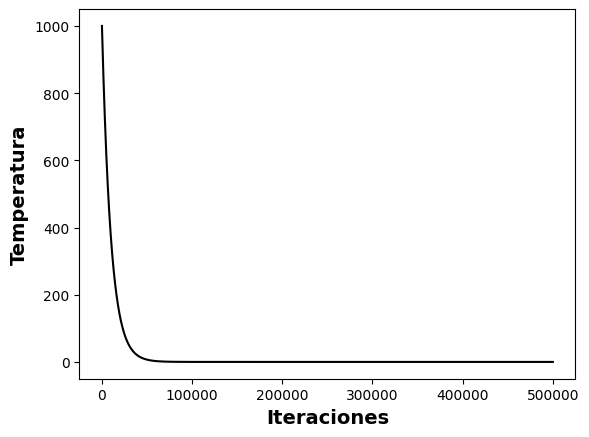

CPU times: user 4min 5s, sys: 984 ms, total: 4min 6s
Wall time: 5min 1s


In [22]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
np.random.seed(42)
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1=40
neuronas_capa_oculta_encoder_2=20
neuronas_capa_oculta_encoder_3=8
neuronas_capa_oculta_decoder_1=8
neuronas_capa_oculta_decoder_2=20
neuronas_capa_oculta_decoder_3=40

W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))

b_1=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_encoder_1))
b_2=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_encoder_2))
b_3=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_encoder_3))
b_4=np.random.uniform(0,0.1, size=(n_neuronas_espacio_latente))
b_5=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_decoder_1))
b_6=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_decoder_2))
b_7=np.random.uniform(0,0.1, size=(neuronas_capa_oculta_decoder_3))
b_8=np.random.uniform(0,0.1, size=(n_atributos))

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


#Se define la función objetivo
def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3
                        ,b1,b2,b3,b4,b5,b6,b7,b8):


  Z1= np.dot(X_datos,W_encoder_modelo_entrada)
  Z11=Z1 + b1
  Z1_act=tanh(Z11)

  Z2 =np.dot(Z1_act,W_E_CO_1)
  Z22=Z2 +b2
  Z2_act=sigmoide(Z22)

  Z3 =np.dot(Z2_act,W_E_CO_2)
  Z33=Z3 + b3
  Z3_act=tanh(Z33)

  Z4 =np.dot(Z3_act,W_E_CO_3)
  Z44=Z4 + b4
  Z4_act=Z44

  Z5 =np.dot(Z4_act,W_D_CO_1)
  Z55=Z5 + b5
  Z5_act=tanh(Z55)

  Z6 =np.dot(Z5_act,W_D_CO_2)
  Z66=Z6+b6
  Z6_act=sigmoide(Z66)

  Z7 =np.dot(Z6_act,W_D_CO_3)
  Z77=Z7+b7
  Z7_act=tanh(Z77)

  Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
  Z88=Z8
  Z8_act=sigmoide(Z88)

  matriz_resultado = (Y_candidato > 0.5).astype(int)
  error = np.abs(Z8_act - X_datos)
  comparacion2 = (X_datos != matriz_resultado).astype(int)

  error_faltante = error * comparacion2
  error_faltante_total= error_faltante.sum()

  #resultado_acertado = (X_datos == matriz_resultado).astype(int)
  #resultado_acertado_total= resultado_acertado.sum()

  error_total_datos= error.sum()
  error_total=(error_total_datos) +error_faltante_total



  return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()

b1_actual=b_1.copy()
b2_actual=b_2.copy()
b3_actual=b_3.copy()
b4_actual=b_4.copy()
b5_actual=b_5.copy()
b6_actual=b_6.copy()
b7_actual=b_7.copy()
b8_actual=b_8.copy()



Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                           ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)


Y_inicial,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                          ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)

#se comienza las iteraciones
iteraciones=500000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)
tasa_bias=0.4
for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual + W_encoder_actual* (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual + W_decoder_actual* (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual + W_E_CO_1_actual* np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual + W_E_CO_2_actual* np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual + W_E_CO_3_actual* np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + W_D_CO_1_actual*np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + W_D_CO_2_actual*np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + W_D_CO_3_actual*np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + b1_actual*np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso*tasa_bias
  b2_candidato=b2_actual + b2_actual*np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso*tasa_bias
  b3_candidato=b3_actual + b3_actual*np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso*tasa_bias
  b4_candidato=b4_actual + b4_actual*np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso*tasa_bias
  b5_candidato=b5_actual + b5_actual*np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso*tasa_bias
  b6_candidato=b6_actual + b6_actual*np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso*tasa_bias
  b7_candidato=b7_actual + b7_actual*np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso*tasa_bias
  b8_candidato=b8_actual + b8_actual*np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso*tasa_bias



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=0.8*(math.exp(-(Diferencia/t))) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

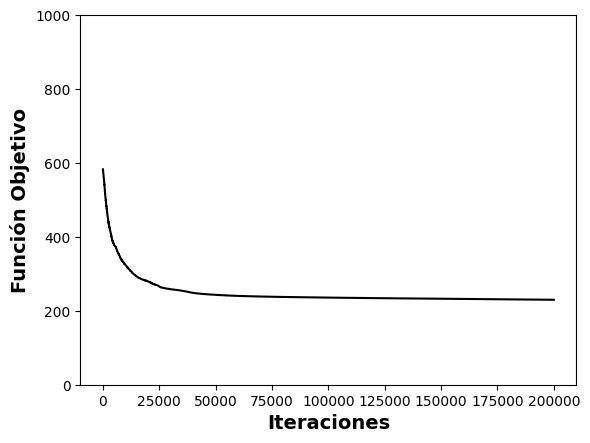

229.82660198874663


In [ ]:
fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1000)
#plt.xlim(0,80000)
plt.show()
print(Error_modelo[-1])

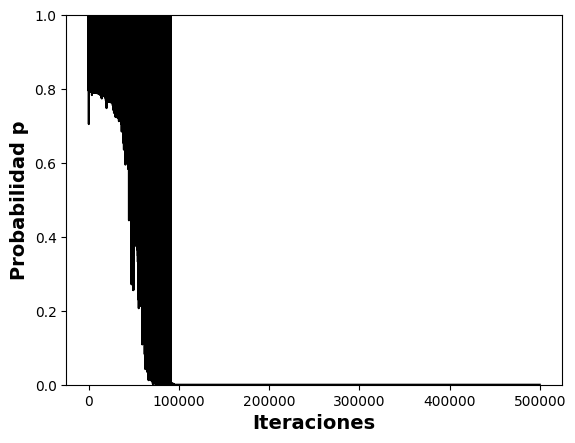

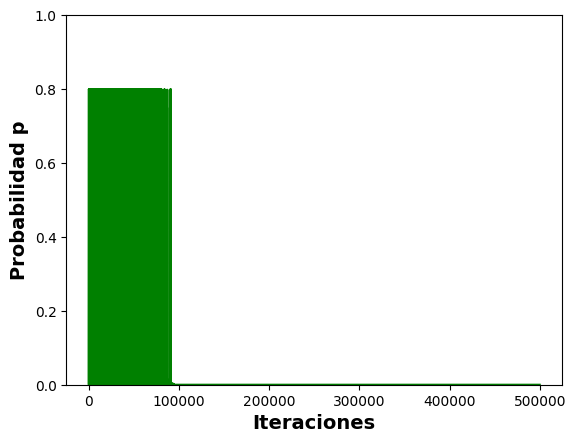

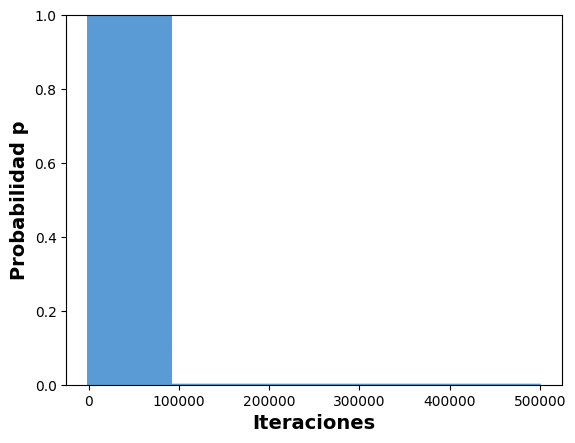

In [25]:
fig, ax = plt.subplots()
ax.plot(Probabilidad_p, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado=Probabilidad_p.copy()
Probabilidad_p_filtrado[Probabilidad_p_filtrado > 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado, color='green')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

Probabilidad_p_filtrado2=Probabilidad_p.copy()
Probabilidad_p_filtrado2[Probabilidad_p_filtrado2 < 1] = 0

fig, ax = plt.subplots()
ax.plot(Probabilidad_p_filtrado2, color='#5A9BD5')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Probabilidad p", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,1)
plt.show()

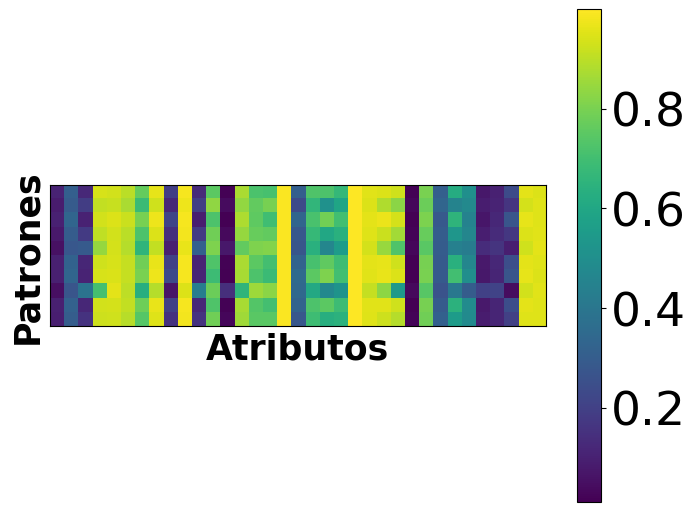

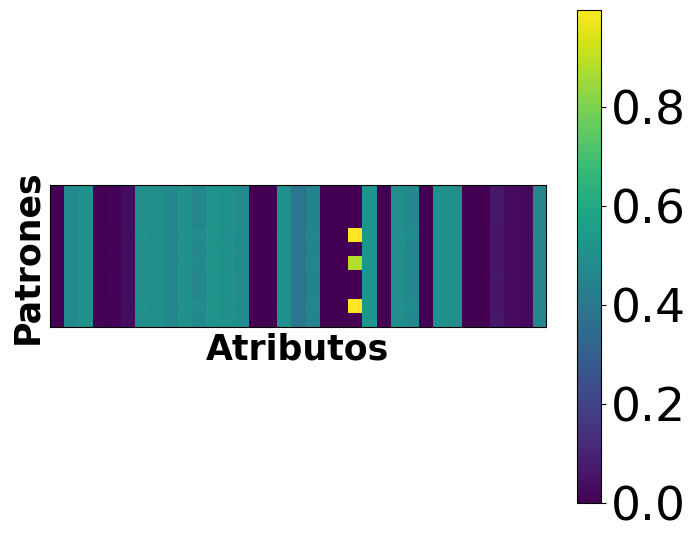

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_inicial, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_candidato, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


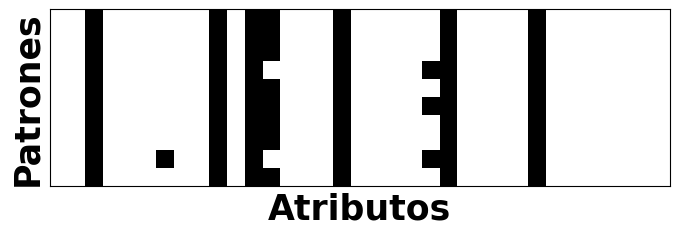

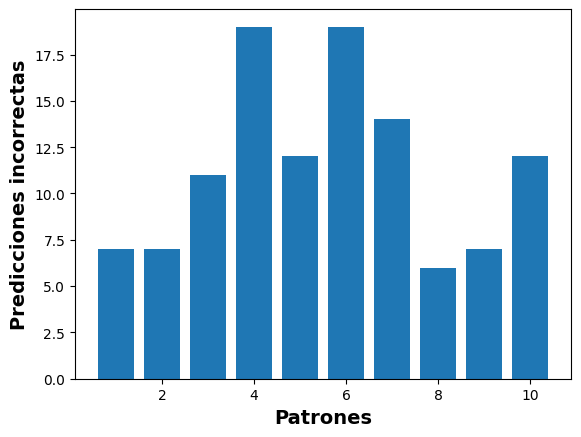

In [24]:
matriz_resultado = (Y_candidato > 0.5).astype(int)
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(matriz_resultado, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


comparacion = X_datos != matriz_resultado

no_coinciden_por_fila = comparacion.sum(axis=1)

plt.bar(range(1, len(no_coinciden_por_fila) + 1), no_coinciden_por_fila)

plt.xlabel('Patrones', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylabel('Predicciones incorrectas', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

plt.show()

comparacion2 = (X_datos != matriz_resultado).astype(int)



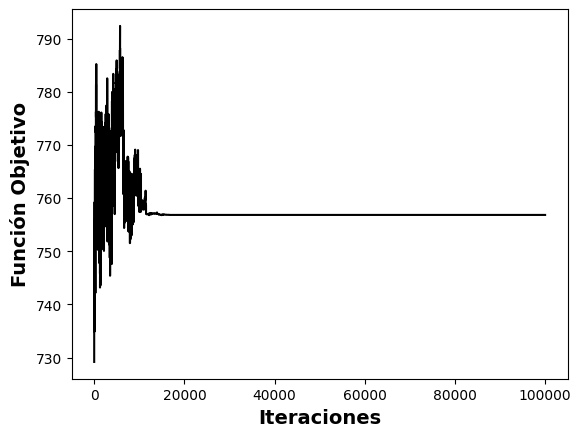

In [ ]:
#se comienza las iteraciones
iteraciones=100000
tamaño_paso_inicial=0.005

#se deefine la temperatura inicial
t_inicial=100
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

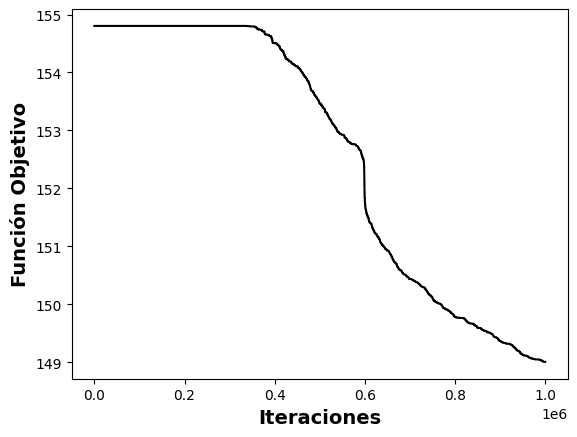

In [ ]:
#se comienza las iteraciones
iteraciones=1000000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=100
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(50))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 :
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

<timed exec>:29: RuntimeWarning: overflow encountered in exp
<ipython-input-44-10cf8f73da82>:47: RuntimeWarning: overflow encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0
<ipython-input-44-10cf8f73da82>:47: RuntimeWarning: invalid value encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0
<ipython-input-44-10cf8f73da82>:47: RuntimeWarning: divide by zero encountered in scalar divide
  criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


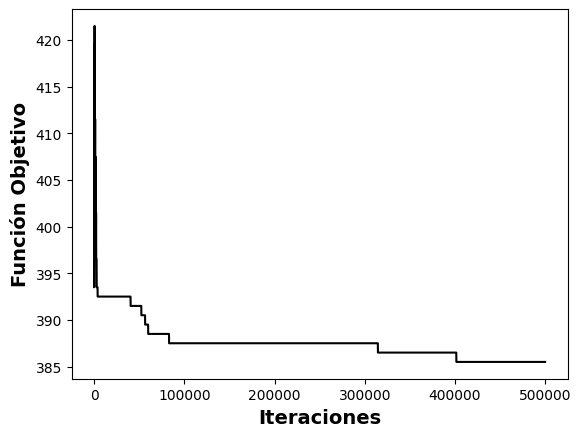

In [ ]:
#segundo paso

#se comienza las iteraciones
iteraciones=500000
tamaño_paso_inicial=0.01

#se deefine la temperatura inicial
t_inicial=10
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso


#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(900))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=math.exp(-(Diferencia/t)) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato
    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual

fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()




In [ ]:
%%time
# red lineal sin bias , optimización mediante simulated annealing
#se inicializa los valores de la red
Errores_inicializados=[]
for j in range (100000):

  np.random.seed(j)
  n_patrones, n_atributos = X_datos.shape

  n_neuronas_espacio_latente = 20

  neuronas_capa_oculta_encoder_1=60
  neuronas_capa_oculta_encoder_2=60
  neuronas_capa_oculta_encoder_3=60
  neuronas_capa_oculta_decoder_1=60
  neuronas_capa_oculta_decoder_2=60
  neuronas_capa_oculta_decoder_3=60

  W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos,neuronas_capa_oculta_encoder_1))
  W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3,n_atributos))


  W_encoder_capa_oculta_1=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1,neuronas_capa_oculta_encoder_2))
  W_encoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2,neuronas_capa_oculta_encoder_3))
  W_encoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3,n_neuronas_espacio_latente))


  W_decoder_capa_oculta_1=np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente,neuronas_capa_oculta_decoder_1))
  W_decoder_capa_oculta_2=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1,neuronas_capa_oculta_decoder_2))
  W_decoder_capa_oculta_3=np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2,neuronas_capa_oculta_decoder_3))


  def sigmoide(x):
      return 1 / (1 + np.exp(-x))

  def tanh(x):
      return np.tanh(x)

  #Se define la función objetivo
  def Funcion_objetivo_02(W_encoder_modelo_entrada,W_decoder_modelo_salida
                        ,W_E_CO_1,W_E_CO_2,W_E_CO_3,W_D_CO_1,W_D_CO_2,W_D_CO_3):

    Z1= np.dot(X_datos,W_encoder_modelo_entrada)
    Z1_act=sigmoide(Z1)

    Z2 =np.dot(Z1_act,W_E_CO_1)
    Z2_act=tanh(Z2)

    Z3 =np.dot(Z2_act,W_E_CO_2)
    Z3_act=sigmoide(Z3)

    Z4 =np.dot(Z3_act,W_E_CO_3)
    Z4_act=tanh(Z4)


    Z5 =np.dot(Z4_act,W_D_CO_1)
    Z5_act=sigmoide(Z5)

    Z6 =np.dot(Z5_act,W_D_CO_2)
    Z6_act=tanh(Z6)

    Z7 =np.dot(Z6_act,W_D_CO_3)
    Z7_act=sigmoide(Z7)

    Z8 =np.dot(Z7_act,W_decoder_modelo_salida)
    Z8_act=tanh(Z8)

    error = np.abs(Z8 - X_datos)
    error_total= error.sum()

    return Z8_act,error_total

#-----------------------------------------------------------------------------------------------------------
  W_encoder_actual=W_encoder_entrada.copy()
  W_decoder_actual=W_decoder_salida.copy()

  W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
  W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
  W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


  W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
  W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
  W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()


  Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3)



  Errores_inicializados.append(Error_actual)

CPU times: user 1min 36s, sys: 184 ms, total: 1min 36s
Wall time: 1min 51s


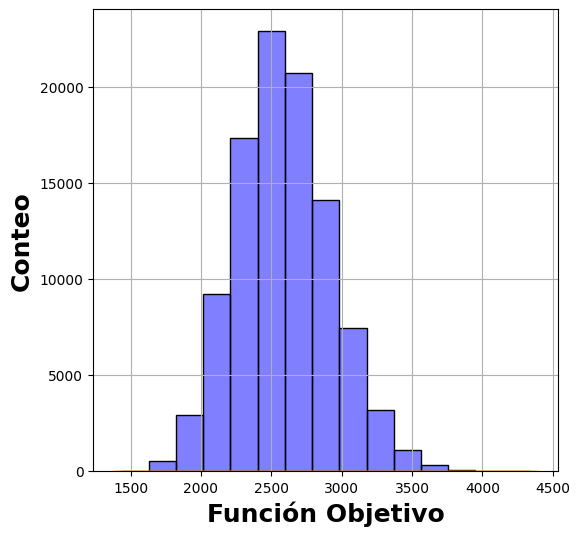

In [ ]:
plt.figure(figsize=(6, 6))

sns.histplot(Errores_inicializados, bins=15, kde=False, color='blue', alpha=0.5, label='Histograma')
sns.kdeplot(Errores_inicializados, bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')

plt.xlabel('Función Objetivo',fontweight='bold', fontsize=18)
plt.ylabel('Conteo', fontweight='bold', fontsize=18)
plt.grid()
plt.show()

# **VAE**

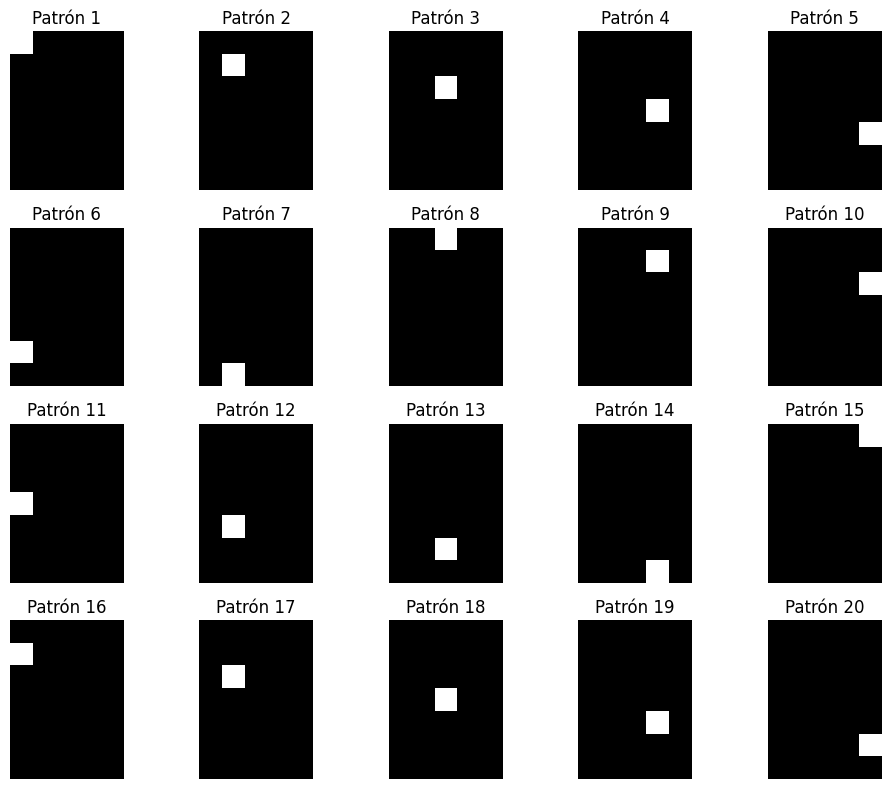

In [102]:
#VAE
def generar_patron_con_linea(i):
    patron = np.zeros((7, 5))


    patron[i % 7, i % 5] = 1

    return patron

patrones = np.array([generar_patron_con_linea(i) for i in range(20)])

fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(patrones[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Patrón {i+1}")

plt.tight_layout()
plt.show()

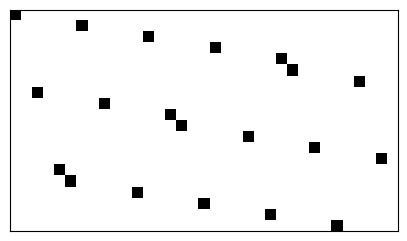

In [113]:
X_datos=patrones.reshape(20, -1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(X_datos, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

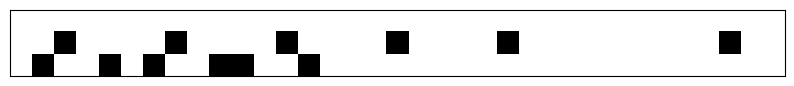

In [123]:
X_datos= []

for pattern in font_1:
    patron = np.zeros((7, 5), dtype=int)
    #se obtiene el patron
    for row in range(7):
        for col in range(5):
            patron[row, col] = (pattern[row] >> (4 - col)) & 1

    # se pasa a un vector
    patron_aplanado = patron.flatten()

    # se añade a la matriz de datos
    X_datos.append(patron_aplanado)

X_datos = np.array(X_datos)

X_datos=X_datos[:3]

# Se grafica los patrones
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(X_datos, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

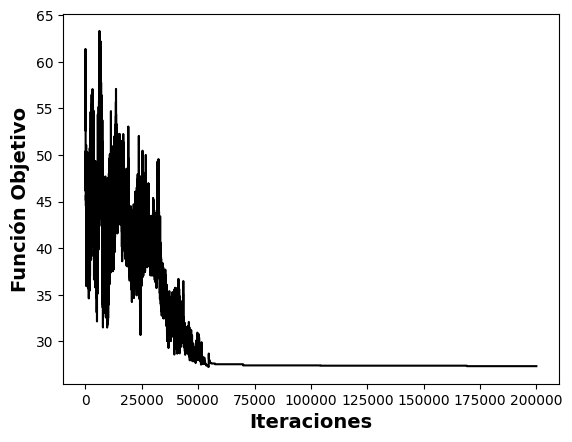

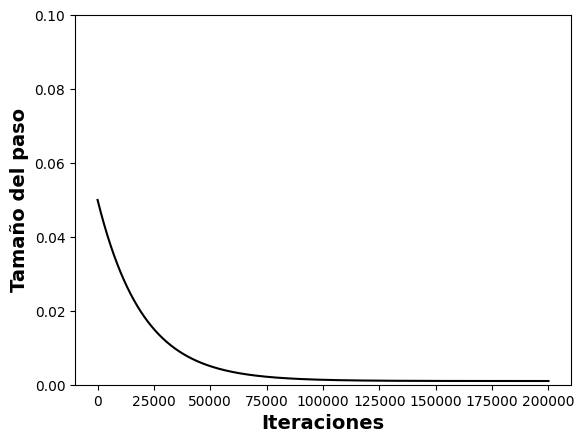

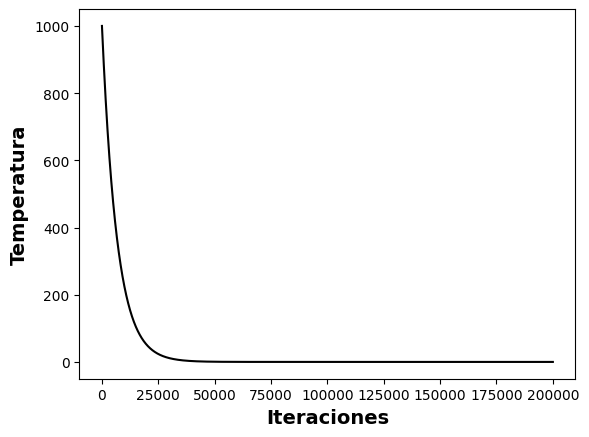

In [124]:
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(42)

# Definir la arquitectura
n_patrones, n_atributos = X_datos.shape
n_neuronas_espacio_latente = 2

neuronas_capa_oculta_encoder_1 = 40
neuronas_capa_oculta_encoder_2 = 20
neuronas_capa_oculta_encoder_3 = 8
neuronas_capa_oculta_decoder_1 = 8
neuronas_capa_oculta_decoder_2 = 20
neuronas_capa_oculta_decoder_3 = 40

# Inicialización de pesos
W_encoder_entrada = np.random.uniform(-1, 1, size=(n_atributos, neuronas_capa_oculta_encoder_1))
W_encoder_capa_oculta_1 = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_1, neuronas_capa_oculta_encoder_2))
W_encoder_capa_oculta_2 = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_2, neuronas_capa_oculta_encoder_3))
W_encoder_capa_oculta_3 = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_encoder_3, n_neuronas_espacio_latente * 2))  # 2 para mu y sigma

W_decoder_capa_oculta_1 = np.random.uniform(-1, 1, size=(n_neuronas_espacio_latente, neuronas_capa_oculta_decoder_1))
W_decoder_capa_oculta_2 = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_1, neuronas_capa_oculta_decoder_2))
W_decoder_capa_oculta_3 = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_2, neuronas_capa_oculta_decoder_3))
W_decoder_salida = np.random.uniform(-1, 1, size=(neuronas_capa_oculta_decoder_3, n_atributos))

# Inicialización de bias
b_1 = np.random.uniform(0, 0.1, size=(neuronas_capa_oculta_encoder_1))
b_2 = np.random.uniform(0, 0.1, size=(neuronas_capa_oculta_encoder_2))
b_3 = np.random.uniform(0, 0.1, size=(neuronas_capa_oculta_encoder_3))
b_4 = np.random.uniform(0, 0.1, size=(n_neuronas_espacio_latente * 2))
b_5 = np.random.uniform(0, 0.1, size=(neuronas_capa_oculta_decoder_1))
b_6 = np.random.uniform(0, 0.1, size=(neuronas_capa_oculta_decoder_2))
b_7 = np.random.uniform(0, 0.1, size=(neuronas_capa_oculta_decoder_3))
b_8 = np.random.uniform(0, 0.1, size=(n_atributos))

# Funciones de activación
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def Funcion_objetivo_02(W_encoder_entrada, W_decoder_salida,
                         W_E_CO_1, W_E_CO_2, W_E_CO_3, W_D_CO_1, W_D_CO_2, W_D_CO_3,
                         b1, b2, b3, b4, b5, b6, b7, b8):

    # Encoder (Codificador)
    Z1 = np.dot(X_datos, W_encoder_entrada) + b1
    Z1_act = np.tanh(Z1)

    Z2 = np.dot(Z1_act, W_E_CO_1) + b2
    Z2_act = sigmoide(Z2)

    Z3 = np.dot(Z2_act, W_E_CO_2) + b3
    Z3_act = np.tanh(Z3)

    Z4 = np.dot(Z3_act, W_E_CO_3) + b4
    Z4_act = Z4

    # Muestreo reparametrizado: X = mu + sigma * epsilon
    mu = Z4_act[:, :n_neuronas_espacio_latente]  # Media
    log_var = Z4_act[:, n_neuronas_espacio_latente:]  # Logaritmo de la varianza
    epsilon = np.random.normal(size=mu.shape)
    z = mu + np.exp(0.5 * log_var) * epsilon  # Muestra latente


    Z5 = np.dot(z, W_D_CO_1) + b5
    Z5_act = np.tanh(Z5)

    Z6 = np.dot(Z5_act, W_D_CO_2) + b6
    Z6_act = sigmoide(Z6)

    Z7 = np.dot(Z6_act, W_D_CO_3) + b7
    Z7_act = np.tanh(Z7)

    Z8 = np.dot(Z7_act, W_decoder_salida) + b8
    Z8_act = sigmoide(Z8)  # Salida reconstruida

    error_reconstruccion = np.sum(np.abs(X_datos - Z8_act))

    kl_divergencia = -0.5 * np.sum(1 + log_var - np.square(mu) - np.exp(log_var))  # Fórmula de KL

    # Función objetivo total (Error de reconstrucción + Regularización KL)
    funcion_objetivo = error_reconstruccion + kl_divergencia

    return Z8_act, funcion_objetivo


#-----------------------------------------------------------------------------------------------------------
W_encoder_actual=W_encoder_entrada.copy()
W_decoder_actual=W_decoder_salida.copy()

W_E_CO_1_actual=W_encoder_capa_oculta_1.copy()
W_E_CO_2_actual=W_encoder_capa_oculta_2.copy()
W_E_CO_3_actual=W_encoder_capa_oculta_3.copy()


W_D_CO_1_actual=W_decoder_capa_oculta_1.copy()
W_D_CO_2_actual=W_decoder_capa_oculta_2.copy()
W_D_CO_3_actual=W_decoder_capa_oculta_3.copy()

b1_actual=b_1.copy()
b2_actual=b_2.copy()
b3_actual=b_3.copy()
b4_actual=b_4.copy()
b5_actual=b_5.copy()
b6_actual=b_6.copy()
b7_actual=b_7.copy()
b8_actual=b_8.copy()



Y_actual,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                           ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)


Y_inicial,Error_actual= Funcion_objetivo_02(W_encoder_entrada,W_decoder_salida
                                           ,W_encoder_capa_oculta_1,W_encoder_capa_oculta_2,W_encoder_capa_oculta_3
                                           ,W_decoder_capa_oculta_1,W_decoder_capa_oculta_2,W_decoder_capa_oculta_3
                                          ,b1_actual,b2_actual,b3_actual,b4_actual,b5_actual,b6_actual,b7_actual,b8_actual)

#se comienza las iteraciones
iteraciones=200000
tamaño_paso_inicial=0.05

#se deefine la temperatura inicial
t_inicial=1000
Error_modelo= np.zeros(iteraciones)

Probabilidad_p=np.zeros(iteraciones)
tamaño_del_paso=np.zeros(iteraciones)
Temperatura_T=np.zeros(iteraciones)

for i in range(iteraciones):

  tamaño_paso=(tamaño_paso_inicial-0.001)*np.exp((-i/iteraciones )*(10))+0.001
  tamaño_del_paso[i]=tamaño_paso



#se avanza un paso
  W_encoder_candidato=W_encoder_actual +  (np.random.uniform(-1, 1, size=W_encoder_actual.shape))*tamaño_paso
  W_decoder_candidato=W_decoder_actual +  (np.random.uniform(-1, 1, size=W_decoder_actual.shape))*tamaño_paso

  W_E_CO_1_candidato=W_E_CO_1_actual +  np.random.uniform(-1, 1, size=W_E_CO_1_actual.shape)*tamaño_paso
  W_E_CO_2_candidato=W_E_CO_2_actual +  np.random.uniform(-1, 1, size=W_E_CO_2_actual.shape)*tamaño_paso
  W_E_CO_3_candidato=W_E_CO_3_actual +  np.random.uniform(-1, 1, size=W_E_CO_3_actual.shape)*tamaño_paso

  W_D_CO_1_candidato=W_D_CO_1_actual + np.random.uniform(-1, 1, size=W_D_CO_1_actual.shape)*tamaño_paso
  W_D_CO_2_candidato=W_D_CO_2_actual + np.random.uniform(-1, 1, size=W_D_CO_2_actual.shape)*tamaño_paso
  W_D_CO_3_candidato=W_D_CO_3_actual + np.random.uniform(-1, 1, size=W_D_CO_3_actual.shape)*tamaño_paso

  b1_candidato=b1_actual + np.random.uniform(-1, 1, size=b1_actual.shape)*tamaño_paso
  b2_candidato=b2_actual + np.random.uniform(-1, 1, size=b2_actual.shape)*tamaño_paso
  b3_candidato=b3_actual + np.random.uniform(-1, 1, size=b3_actual.shape)*tamaño_paso
  b4_candidato=b4_actual + np.random.uniform(-1, 1, size=b4_actual.shape)*tamaño_paso
  b5_candidato=b5_actual + np.random.uniform(-1, 1, size=b5_actual.shape)*tamaño_paso
  b6_candidato=b6_actual + np.random.uniform(-1, 1, size=b6_actual.shape)*tamaño_paso
  b7_candidato=b7_actual + np.random.uniform(-1, 1, size=b7_actual.shape)*tamaño_paso
  b8_candidato=b8_actual + np.random.uniform(-1, 1, size=b8_actual.shape)*tamaño_paso



#se evalua el nuevo paso
  Y_candidato,Error_candidato= Funcion_objetivo_02(W_encoder_candidato,W_decoder_candidato
                                                   ,W_E_CO_1_candidato,W_E_CO_2_candidato,W_E_CO_3_candidato
                                                   ,W_D_CO_1_candidato,W_D_CO_2_candidato,W_D_CO_3_candidato
                                                   ,b1_candidato,b2_candidato,b3_candidato,b4_candidato,b5_candidato,b6_candidato
                                                   ,b7_candidato,b8_candidato)
#se compara la solución actual con la candidata
  Diferencia= Error_candidato-Error_actual
#se calcula la temperatura, se divide por la iteración para que tienda a 0 a meedida que aumente las iteraciones
  t=t_inicial*np.exp((-i/iteraciones )*(30))
#se calcular el criterio de aceptación
  if Diferencia <0 :
    criterio=2
  if Diferencia >=0 :
    criterio=0.2*(math.exp(-(Diferencia/t))) if (-Diferencia / t) < 700 else 0


  Probabilidad_p[i]=criterio
  Temperatura_T[i]=t
#se acepta la mejor solución, con una probabilidad de aceptar una solución peor
  ñ=abs(np.random.randn())
  if Diferencia < 0 or ñ< criterio:
    W_encoder_actual=W_encoder_candidato
    W_decoder_actual=W_decoder_candidato
    W_E_CO_1_actual=W_E_CO_1_candidato
    W_E_CO_2_actual=W_E_CO_2_candidato
    W_E_CO_3_actual=W_E_CO_3_candidato
    W_D_CO_1_actual=W_D_CO_1_candidato
    W_D_CO_2_actual=W_D_CO_2_candidato
    W_D_CO_3_actual=W_D_CO_3_candidato

    b1_actual=b1_candidato
    b2_actual=b2_candidato
    b3_actual=b3_candidato
    b4_actual=b4_candidato
    b5_actual=b5_candidato
    b6_actual=b6_candidato
    b7_actual=b7_candidato
    b8_actual=b8_candidato


    Error_actual=Error_candidato
  Error_modelo[i]=Error_actual




fig, ax = plt.subplots()
ax.plot(Error_modelo, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Función Objetivo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots()
ax.plot(tamaño_del_paso, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Tamaño del paso", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylim(0,0.1)
plt.show()


fig, ax = plt.subplots()
ax.plot(Temperatura_T, color='black')
ax.set_xlabel("Iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Temperatura", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

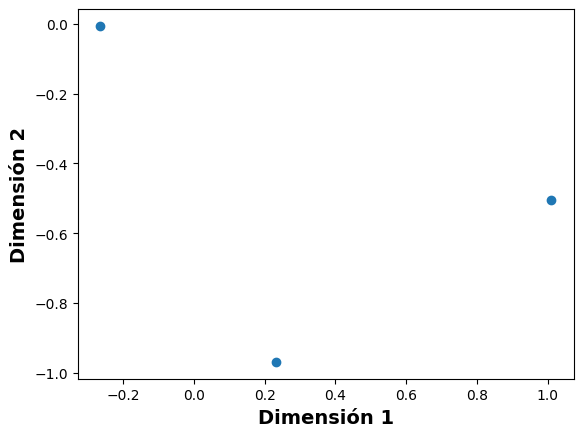

In [127]:
Z1= np.dot(X_datos,W_encoder_actual)
Z11=Z1 + b1_actual
Z1_act=tanh(Z11)

Z2 =np.dot(Z1_act,W_E_CO_1_actual)
Z22=Z2 +b2_actual
Z2_act=sigmoide(Z22)

Z3 =np.dot(Z2_act,W_E_CO_2_actual)
Z33=Z3 + b3_actual
Z3_act=tanh(Z33)

Z4 =np.dot(Z3_act,W_E_CO_3_actual)
Z44=Z4 + b4_actual
Z4_act=Z44

# Muestreo reparametrizado: X = mu + sigma * epsilon
mu = Z4_act[:, :n_neuronas_espacio_latente]  # Media
log_var = Z4_act[:, n_neuronas_espacio_latente:]  # Logaritmo de la varianza
epsilon = np.random.normal(size=mu.shape)
z = mu + np.exp(0.5 * log_var) * epsilon  # Muestra latente


plt.scatter(z[:, 0],z[:, 1])
plt.xlabel("Dimensión 1", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})  # Etiqueta del eje x
plt.ylabel("Dimensión 2", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})  # Etiqueta del eje y
plt.show()

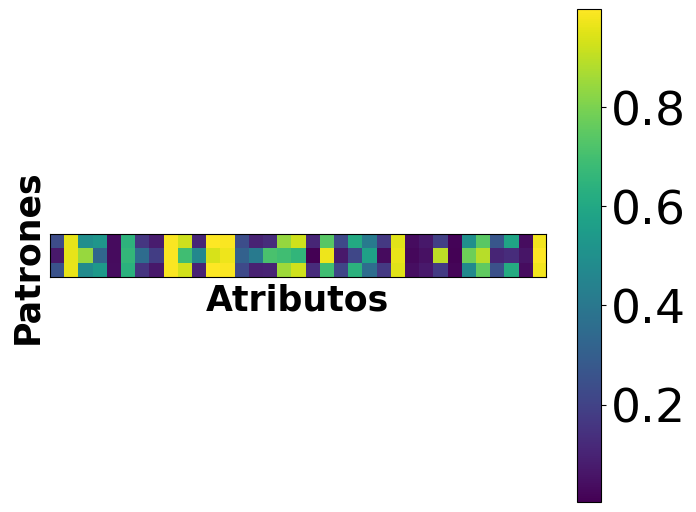

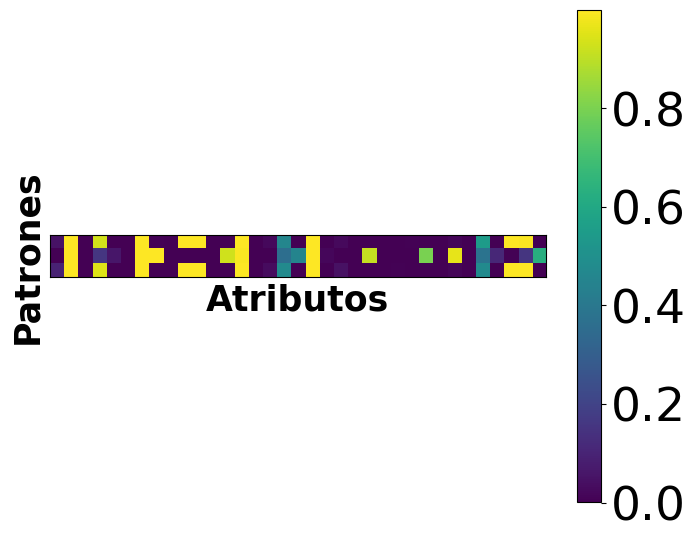

In [128]:
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_inicial, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(Y_candidato, cmap='viridis', interpolation='nearest')
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', shrink=0.8)
cbar.ax.tick_params(labelsize=34)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

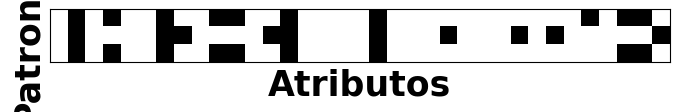

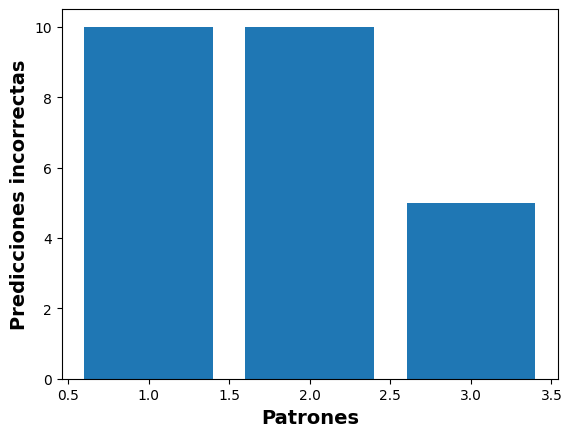

In [129]:
matriz_resultado = (Y_candidato > 0.5).astype(int)
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.imshow(matriz_resultado, cmap='Greys', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Atributos", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
ax.set_ylabel("Patrones", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()


comparacion = X_datos != matriz_resultado

no_coinciden_por_fila = comparacion.sum(axis=1)

plt.bar(range(1, len(no_coinciden_por_fila) + 1), no_coinciden_por_fila)

plt.xlabel('Patrones', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylabel('Predicciones incorrectas', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

plt.show()